<a href="https://colab.research.google.com/github/HaikalFaruq/Student-Stress-Monitoring/blob/main/student_stress_monitoring_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle
from google.colab import files
files.upload()  # pilih kaggle.json
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d mdsultanulislamovi/student-stress-monitoring-datasets -p data --unzip

Dataset URL: https://www.kaggle.com/datasets/mdsultanulislamovi/student-stress-monitoring-datasets
License(s): apache-2.0
  0% 0.00/23.8k [00:00<?, ?B/s]
100% 23.8k/23.8k [00:00<00:00, 107MB/s]


In [ ]:
import os
os.listdir("data")

['StressLevelDataset.csv', 'Stress_Dataset.csv']

In [ ]:
import pandas as pd
df = pd.read_csv("data/StressLevelDataset.csv")  # atau nama file sesuai hasil ls
df.head()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_regression
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif, RFECV, RFE
from sklearn.decomposition import PCA
from sklearn.ensemble import  RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import label_binarize
from sklearn import metrics
import xgboost as xgb
import lightgbm as lgb

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

DATASET OVERVIEW
Dataset Shape: (1100, 21)
Total Records: 1100
Total Features: 21

Column Names:
['anxiety_level', 'self_esteem', 'mental_health_history', 'depression', 'headache', 'blood_pressure', 'sleep_quality', 'breathing_problem', 'noise_level', 'living_conditions', 'safety', 'basic_needs', 'academic_performance', 'study_load', 'teacher_student_relationship', 'future_career_concerns', 'social_support', 'peer_pressure', 'extracurricular_activities', 'bullying', 'stress_level']

First 5 rows of the dataset:
   anxiety_level  self_esteem  mental_health_history  depression  headache  \
0             14           20                      0          11         2   
1             15            8                      1          15         5   
2             12           18                      1          14         2   
3             16           12                      1          15         4   
4             16           28                      0           7         2   

   blood_press

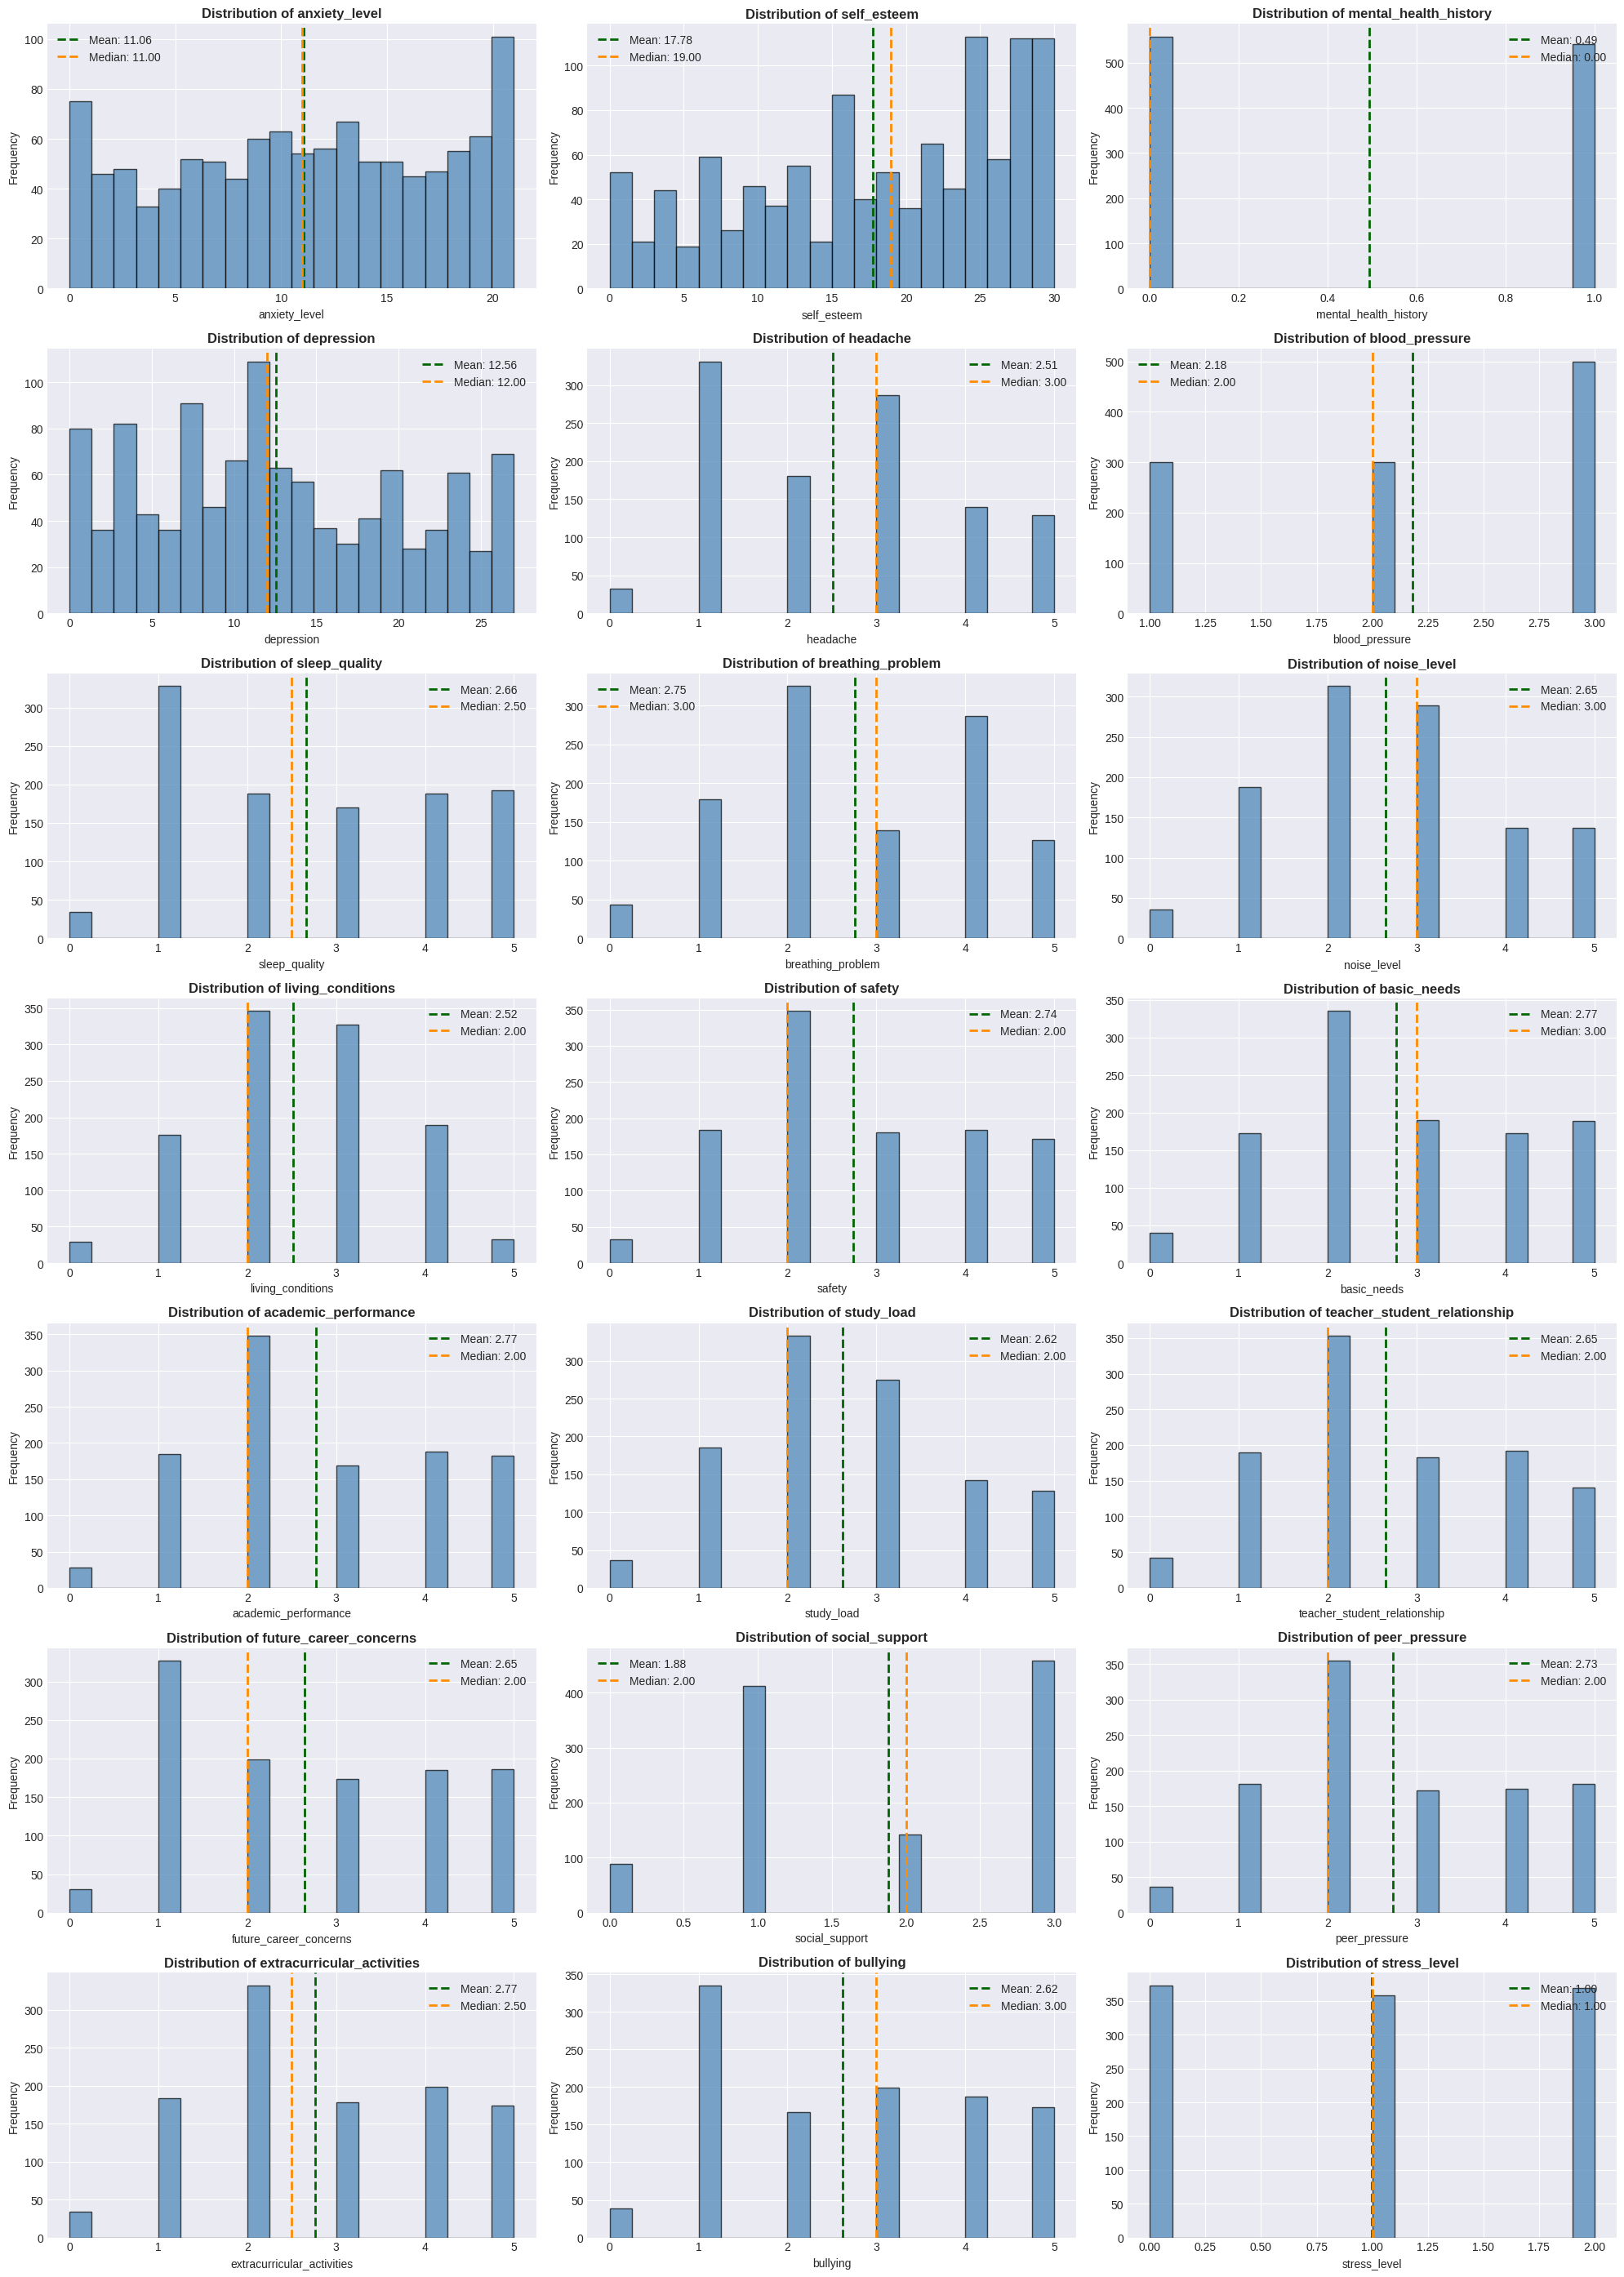


Skewness of Features:
headache                        0.270494
study_load                      0.228964
depression                      0.216638
noise_level                     0.207122
future_career_concerns          0.204276
teacher_student_relationship    0.198016
peer_pressure                   0.194719
safety                          0.188097
academic_performance            0.184316
sleep_quality                   0.177975
bullying                        0.175348
basic_needs                     0.135859
extracurricular_activities      0.135604
mental_health_history           0.029134
living_conditions               0.018794
stress_level                    0.006728
breathing_problem              -0.001625
anxiety_level                  -0.082612
social_support                 -0.180958
blood_pressure                 -0.351186
self_esteem                    -0.396539
dtype: float64

TARGET VARIABLE ANALYSIS (stress_level)


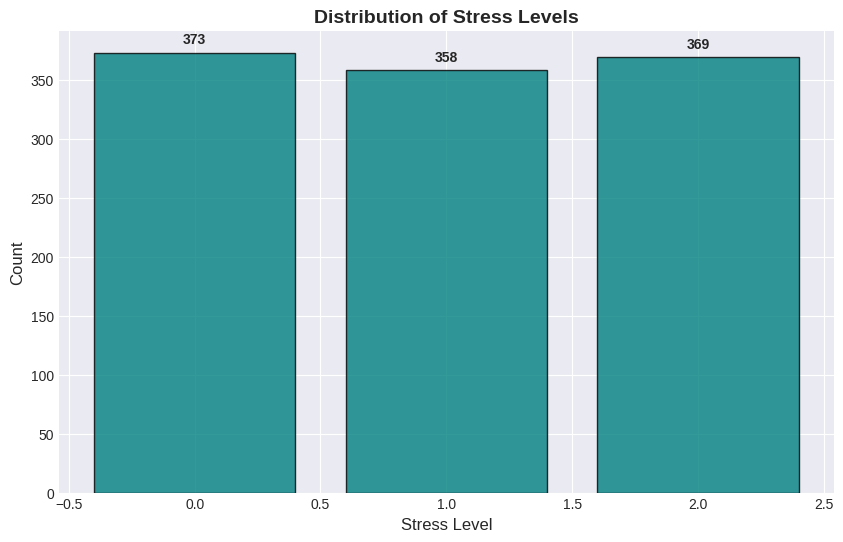


Stress Level Value Counts:
stress_level
0    373
1    358
2    369
Name: count, dtype: int64

Percentage Distribution:
stress_level
0    33.91
1    32.55
2    33.55
Name: count, dtype: float64

CORRELATION ANALYSIS


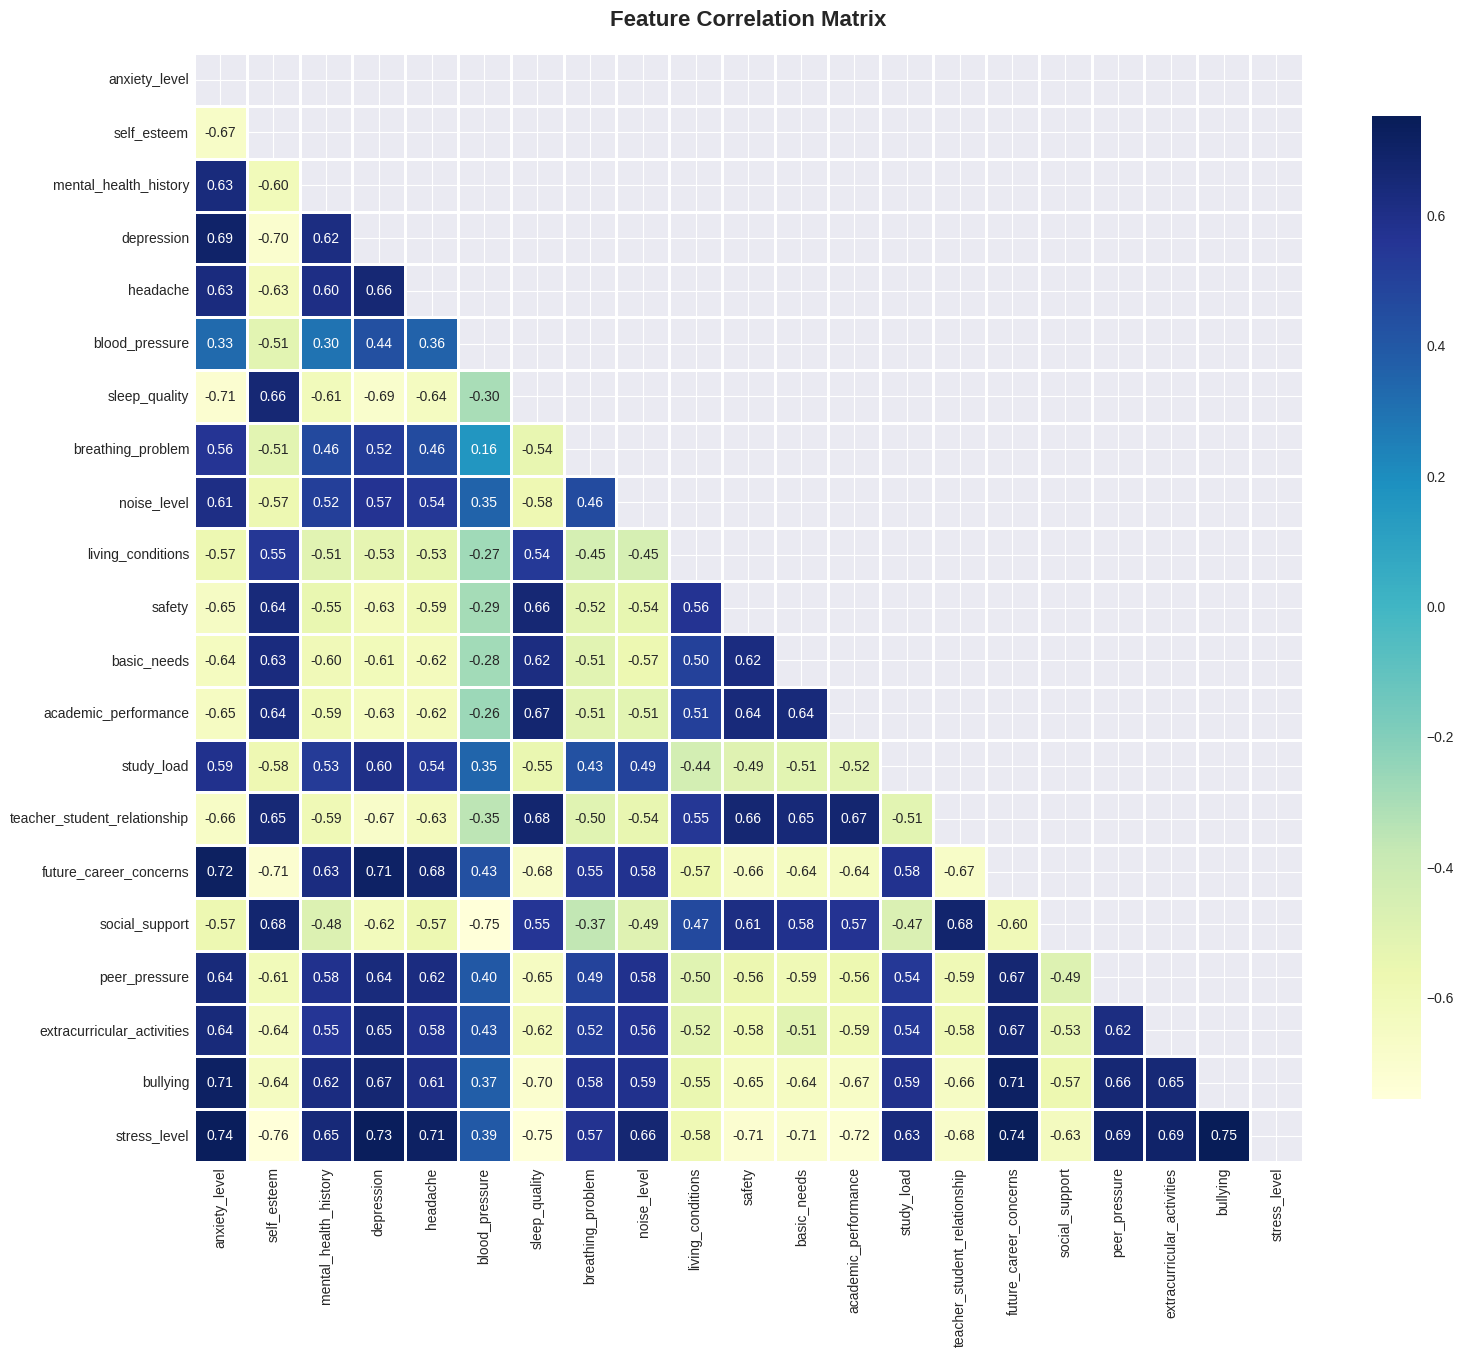


Top 10 Features Correlated with Stress Level:
bullying                      0.751162
future_career_concerns        0.742619
anxiety_level                 0.736795
depression                    0.734379
headache                      0.713484
extracurricular_activities    0.692977
peer_pressure                 0.690684
noise_level                   0.663371
mental_health_history         0.648644
study_load                    0.634156
Name: stress_level, dtype: float64

Bottom 10 Features Correlated with Stress Level:
breathing_problem               0.573984
blood_pressure                  0.394200
living_conditions              -0.581723
social_support                 -0.632497
teacher_student_relationship   -0.680163
basic_needs                    -0.708968
safety                         -0.709602
academic_performance           -0.720922
sleep_quality                  -0.749068
self_esteem                    -0.756195
Name: stress_level, dtype: float64


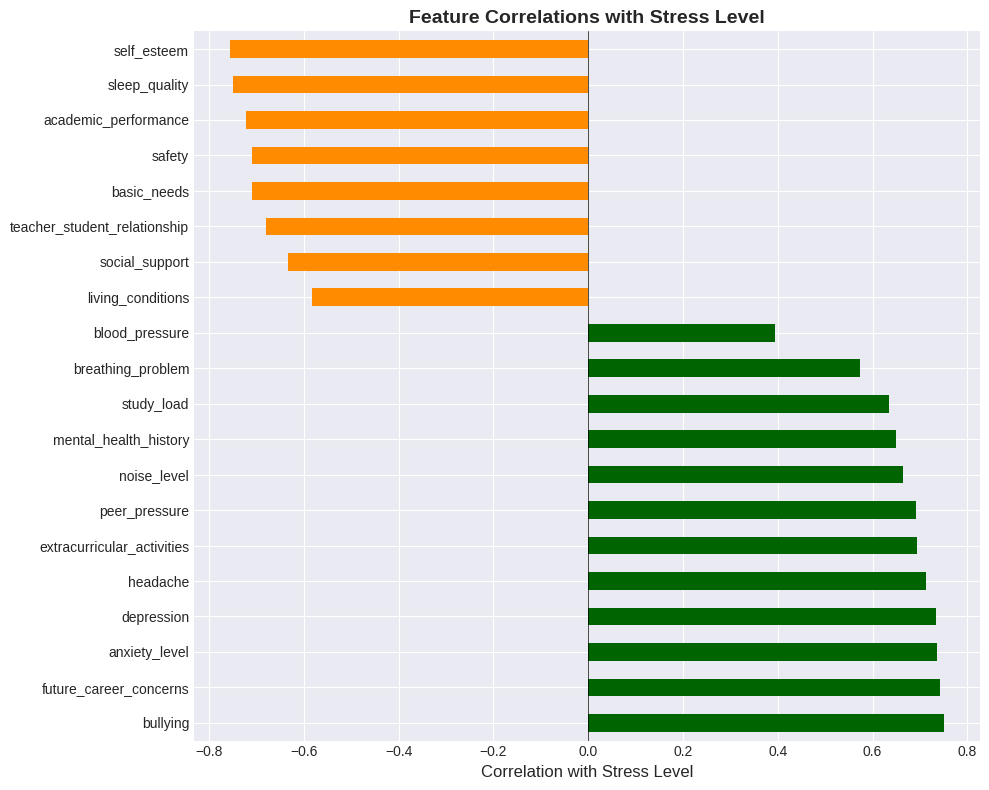


MULTICOLLINEARITY DETECTION

Highly Correlated Feature Pairs (|correlation| > 0.7):
                 Feature 1               Feature 2  Correlation
16                bullying            stress_level     0.751162
15  future_career_concerns            stress_level     0.742619
3            anxiety_level            stress_level     0.736795
7               depression            stress_level     0.734379
1            anxiety_level  future_career_concerns     0.717016
8                 headache            stress_level     0.713484
14  future_career_concerns                bullying     0.711278
2            anxiety_level                bullying     0.709982
6               depression  future_career_concerns     0.706561
12             basic_needs            stress_level    -0.708968
11                  safety            stress_level    -0.709602
0            anxiety_level           sleep_quality    -0.710292
4              self_esteem  future_career_concerns    -0.712520
13    academic_perf

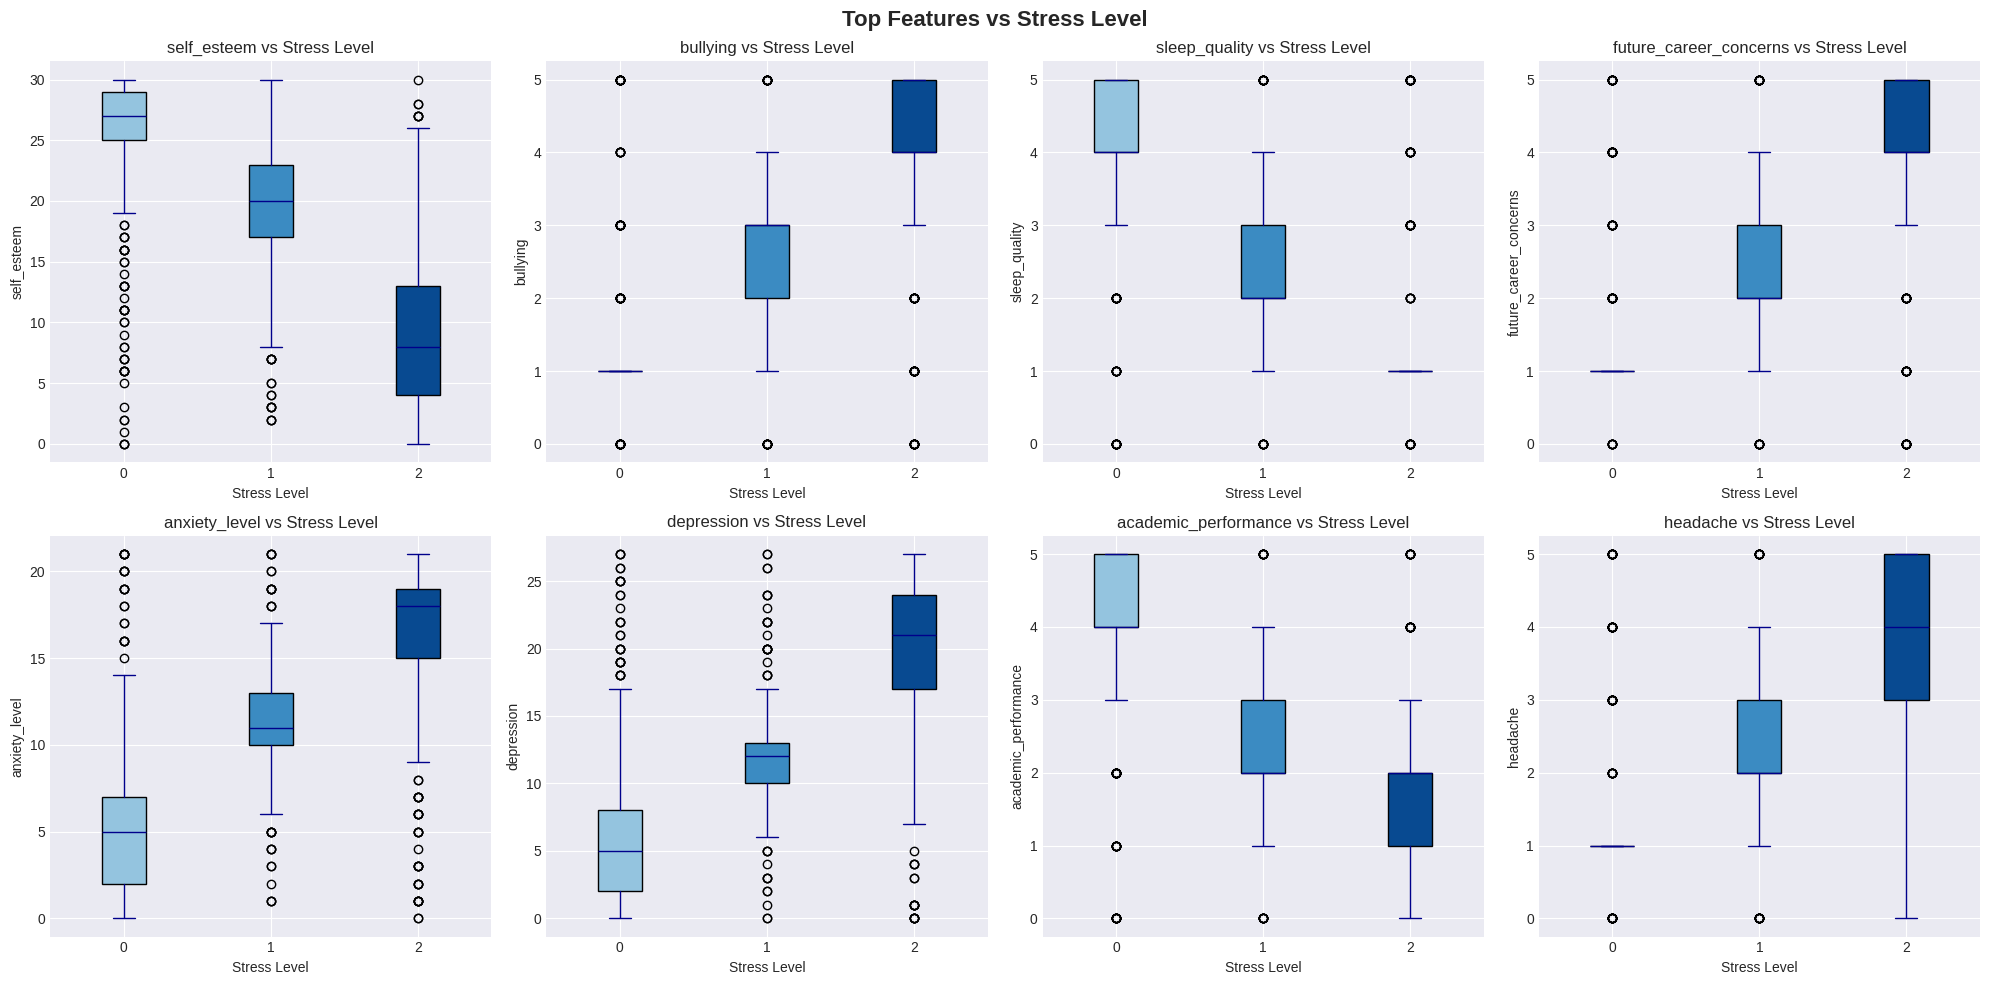


OUTLIER DETECTION

Outlier Summary (IQR Method):
                   count  percentage
noise_level        173.0   15.727273
study_load         165.0   15.000000
living_conditions   62.0    5.636364


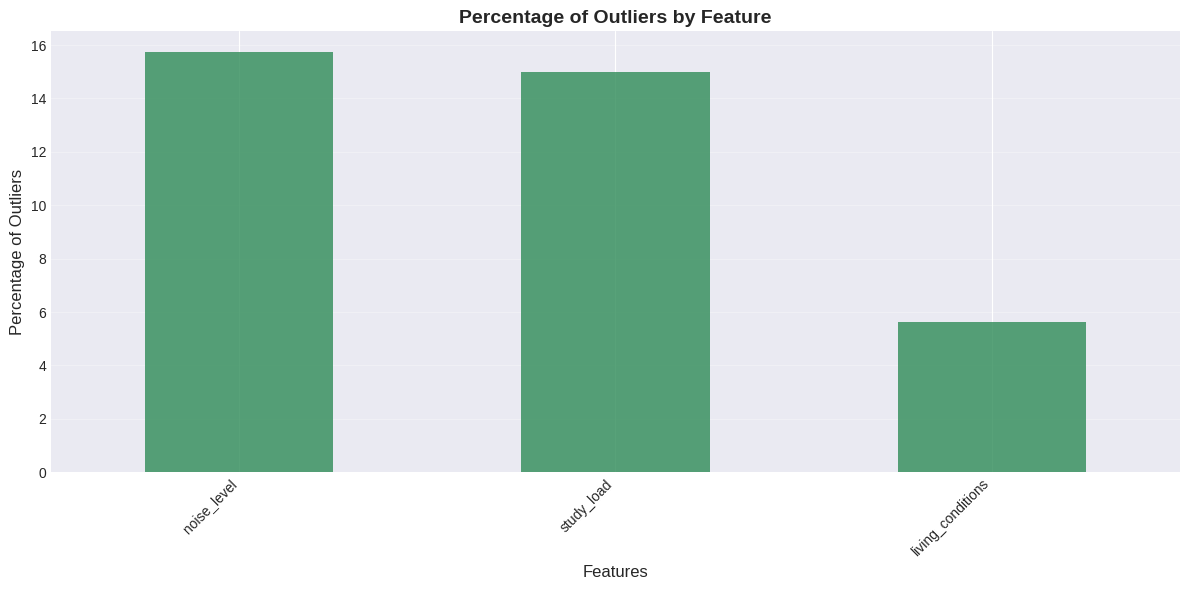


FEATURE IMPORTANCE ANALYSIS

Mutual Information Scores:
                         Feature  MI Score
5                 blood_pressure  0.757233
6                  sleep_quality  0.678559
15        future_career_concerns  0.676649
3                     depression  0.663099
0                  anxiety_level  0.635312
19                      bullying  0.625204
1                    self_esteem  0.601443
4                       headache  0.581823
12          academic_performance  0.547959
14  teacher_student_relationship  0.539078
16                social_support  0.529902
10                        safety  0.524940
11                   basic_needs  0.522586
18    extracurricular_activities  0.519117
17                 peer_pressure  0.495004
8                    noise_level  0.428170
9              living_conditions  0.413704
13                    study_load  0.412941
7              breathing_problem  0.338456
2          mental_health_history  0.243735


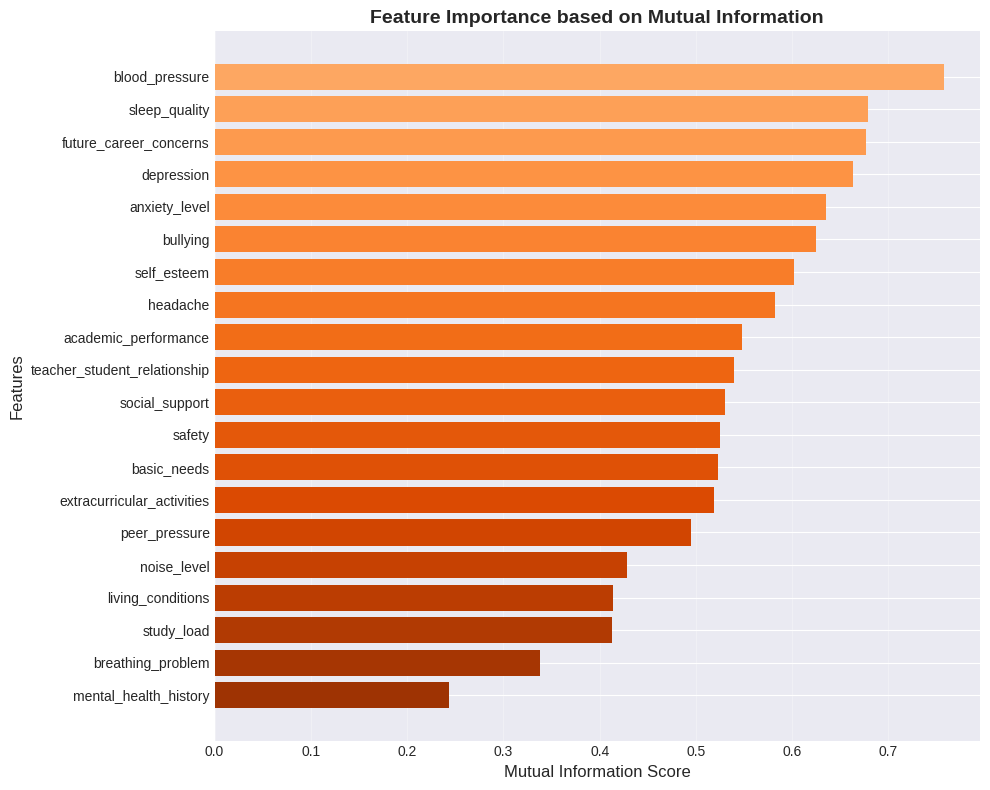


DIMENSIONALITY REDUCTION (PCA)


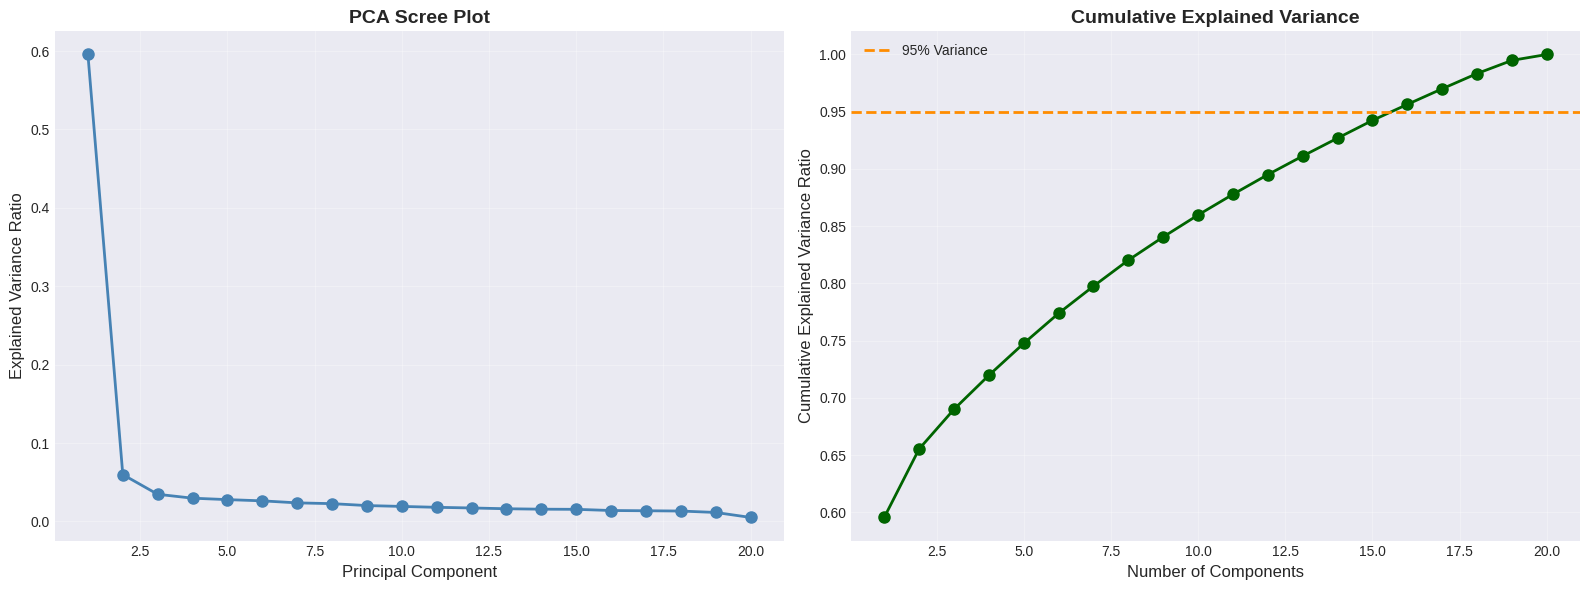


Number of components needed for 95% variance: 16

STATISTICAL TESTS

Normality Test for Stress Level:
Statistic: 7361.7179
P-value: 0.0000
Is normally distributed? No

ANOVA Tests (Feature groups by stress level):

anxiety_level:
  F-statistic: 655.4532
  P-value: 0.0000
  Significant difference? Yes

depression:
  F-statistic: 652.6293
  P-value: 0.0000
  Significant difference? Yes

academic_performance:
  F-statistic: 639.2229
  P-value: 0.0000
  Significant difference? Yes

RECOMMENDATIONS FOR ML PREPROCESSING

1. FEATURE SCALING:
   - All features are on similar scales (mostly 0-5 range)
   - StandardScaler or MinMaxScaler recommended for algorithms sensitive to scale
   - Tree-based models may not require scaling

2. HANDLING MULTICOLLINEARITY:
   - Consider removing one feature from highly correlated pairs
   - Or use dimensionality reduction techniques (PCA, LDA)

3. OUTLIER TREATMENT:
   - Consider capping outliers or using robust scaling
   - Tree-based models are generally 

In [ ]:
# Comprehensive Analysis of Stress Level Dataset for Machine Learning

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
# Custom color palettes - choose one or mix them
blue_palette = sns.color_palette("Blues_r", n_colors=8)
green_palette = sns.color_palette("Greens_r", n_colors=8)
orange_palette = sns.color_palette("Oranges_r", n_colors=8)
# Set a blue-green palette as default
sns.set_palette("viridis")

# =============================================================================
# 1. DATA LOADING AND INITIAL EXPLORATION
# =============================================================================

# Load the dataset
df = pd.read_csv('data/StressLevelDataset.csv')

print("=" * 80)
print("DATASET OVERVIEW")
print("=" * 80)
print(f"Dataset Shape: {df.shape}")
print(f"Total Records: {df.shape[0]}")
print(f"Total Features: {df.shape[1]}")
print("\nColumn Names:")
print(df.columns.tolist())

# Display first few rows
print("\nFirst 5 rows of the dataset:")
print(df.head())

# =============================================================================
# 2. DATA QUALITY ASSESSMENT
# =============================================================================

print("\n" + "=" * 80)
print("DATA QUALITY ASSESSMENT")
print("=" * 80)

# Check data types
print("\nData Types:")
print(df.dtypes)

# Check for missing values
print("\nMissing Values:")
missing_values = df.isnull().sum()
if missing_values.sum() == 0:
    print("No missing values found in the dataset!")
else:
    print(missing_values[missing_values > 0])

# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"\nDuplicate Rows: {duplicates}")

# Basic statistics
print("\nBasic Statistics:")
print(df.describe())

# =============================================================================
# 3. UNIVARIATE ANALYSIS - DISTRIBUTION OF FEATURES
# =============================================================================

print("\n" + "=" * 80)
print("UNIVARIATE ANALYSIS")
print("=" * 80)

# Create subplots for all features
fig, axes = plt.subplots(7, 3, figsize=(20, 28))
axes = axes.ravel()

for idx, col in enumerate(df.columns):
    # Use different shades of blue for histograms
    axes[idx].hist(df[col], bins=20, edgecolor='black', alpha=0.7, color='steelblue')
    axes[idx].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')

    # Add mean and median lines
    mean_val = df[col].mean()
    median_val = df[col].median()
    axes[idx].axvline(mean_val, color='darkgreen', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    axes[idx].axvline(median_val, color='darkorange', linestyle='--', linewidth=2, label=f'Median: {median_val:.2f}')
    axes[idx].legend()

plt.tight_layout()
plt.savefig('feature_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

# Check for skewness
print("\nSkewness of Features:")
skewness = df.skew()
print(skewness.sort_values(ascending=False))

# =============================================================================
# 4. TARGET VARIABLE ANALYSIS
# =============================================================================

print("\n" + "=" * 80)
print("TARGET VARIABLE ANALYSIS (stress_level)")
print("=" * 80)

# Stress level distribution
plt.figure(figsize=(10, 6))
stress_counts = df['stress_level'].value_counts().sort_index()
bars = plt.bar(stress_counts.index, stress_counts.values, edgecolor='black', color='teal', alpha=0.8)
plt.xlabel('Stress Level', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Stress Levels', fontsize=14, fontweight='bold')
# Add value labels on bars
for i, v in enumerate(stress_counts.values):
    plt.text(stress_counts.index[i], v + 5, str(v), ha='center', va='bottom', fontweight='bold')
plt.savefig('stress_level_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nStress Level Value Counts:")
print(stress_counts)
print(f"\nPercentage Distribution:")
print((stress_counts / len(df) * 100).round(2))

# =============================================================================
# 5. CORRELATION ANALYSIS
# =============================================================================

print("\n" + "=" * 80)
print("CORRELATION ANALYSIS")
print("=" * 80)

# Compute correlation matrix
correlation_matrix = df.corr()

# Create a large heatmap for correlation matrix
plt.figure(figsize=(16, 14))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
# Use a blue-green colormap
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f',
            cmap='YlGnBu', center=0, square=True, linewidths=1,
            cbar_kws={"shrink": .8})
plt.title('Feature Correlation Matrix', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Top correlations with stress_level
stress_correlations = correlation_matrix['stress_level'].drop('stress_level').sort_values(ascending=False)
print("\nTop 10 Features Correlated with Stress Level:")
print(stress_correlations.head(10))
print("\nBottom 10 Features Correlated with Stress Level:")
print(stress_correlations.tail(10))

# Visualize correlations with stress_level
plt.figure(figsize=(10, 8))
colors = ['darkgreen' if x > 0 else 'darkorange' for x in stress_correlations]
stress_correlations.plot(kind='barh', color=colors)
plt.xlabel('Correlation with Stress Level', fontsize=12)
plt.title('Feature Correlations with Stress Level', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.tight_layout()
plt.savefig('stress_correlations.png', dpi=300, bbox_inches='tight')
plt.show()

# =============================================================================
# 6. MULTICOLLINEARITY DETECTION
# =============================================================================

print("\n" + "=" * 80)
print("MULTICOLLINEARITY DETECTION")
print("=" * 80)

# Find highly correlated feature pairs
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:  # Threshold of 0.7
            high_corr_pairs.append({
                'Feature 1': correlation_matrix.columns[i],
                'Feature 2': correlation_matrix.columns[j],
                'Correlation': correlation_matrix.iloc[i, j]
            })

if high_corr_pairs:
    high_corr_df = pd.DataFrame(high_corr_pairs).sort_values('Correlation', ascending=False)
    print("\nHighly Correlated Feature Pairs (|correlation| > 0.7):")
    print(high_corr_df)
else:
    print("\nNo highly correlated feature pairs found (threshold: 0.7)")

# =============================================================================
# 7. BIVARIATE ANALYSIS - FEATURE VS STRESS LEVEL
# =============================================================================

print("\n" + "=" * 80)
print("BIVARIATE ANALYSIS")
print("=" * 80)

# Select top features based on correlation
top_features = stress_correlations.abs().nlargest(8).index.tolist()

# Create box plots for top features vs stress level
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()

for idx, feature in enumerate(top_features):
    # Group data by stress level for the current feature
    data_to_plot = [df[df['stress_level'] == level][feature].values
                    for level in sorted(df['stress_level'].unique())]

    # Create box plot with custom colors
    bp = axes[idx].boxplot(data_to_plot, patch_artist=True)

    # Color the boxes with a gradient of blues
    colors = plt.cm.Blues(np.linspace(0.4, 0.9, len(bp['boxes'])))
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)

    # Customize other elements
    for element in ['whiskers', 'fliers', 'medians', 'caps']:
        plt.setp(bp[element], color='darkblue')

    axes[idx].set_title(f'{feature} vs Stress Level', fontsize=12)
    axes[idx].set_xlabel('Stress Level')
    axes[idx].set_ylabel(feature)
    axes[idx].set_xticklabels(sorted(df['stress_level'].unique()))

plt.suptitle('Top Features vs Stress Level', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('feature_vs_stress_boxplots.png', dpi=300, bbox_inches='tight')
plt.show()

# =============================================================================
# 8. OUTLIER DETECTION
# =============================================================================

print("\n" + "=" * 80)
print("OUTLIER DETECTION")
print("=" * 80)

# Detect outliers using IQR method
outlier_summary = {}
for col in df.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    outlier_summary[col] = {
        'count': len(outliers),
        'percentage': (len(outliers) / len(df)) * 100
    }

outlier_df = pd.DataFrame(outlier_summary).T
outlier_df = outlier_df.sort_values('count', ascending=False)
print("\nOutlier Summary (IQR Method):")
print(outlier_df[outlier_df['count'] > 0])

# Visualize outliers
plt.figure(figsize=(12, 6))
outlier_df[outlier_df['count'] > 0]['percentage'].plot(kind='bar', color='seagreen', alpha=0.8)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Percentage of Outliers', fontsize=12)
plt.title('Percentage of Outliers by Feature', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('outlier_percentages.png', dpi=300, bbox_inches='tight')
plt.show()

# =============================================================================
# 9. FEATURE IMPORTANCE USING MUTUAL INFORMATION
# =============================================================================

print("\n" + "=" * 80)
print("FEATURE IMPORTANCE ANALYSIS")
print("=" * 80)

# Calculate mutual information scores
X = df.drop('stress_level', axis=1)
y = df['stress_level']

mi_scores = mutual_info_regression(X, y, random_state=42)
mi_scores_df = pd.DataFrame({
    'Feature': X.columns,
    'MI Score': mi_scores
}).sort_values('MI Score', ascending=False)

print("\nMutual Information Scores:")
print(mi_scores_df)

# Visualize mutual information scores
plt.figure(figsize=(10, 8))
# Create gradient colors from orange to dark orange
colors = plt.cm.Oranges(np.linspace(0.4, 0.9, len(mi_scores_df)))
plt.barh(mi_scores_df['Feature'], mi_scores_df['MI Score'], color=colors)
plt.xlabel('Mutual Information Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Feature Importance based on Mutual Information', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('mutual_information_scores.png', dpi=300, bbox_inches='tight')
plt.show()

# =============================================================================
# 10. DIMENSIONALITY REDUCTION VISUALIZATION
# =============================================================================

print("\n" + "=" * 80)
print("DIMENSIONALITY REDUCTION (PCA)")
print("=" * 80)

# Standardize features for PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Plot explained variance
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Scree plot
ax1.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, 'o-',
         color='steelblue', markersize=8, linewidth=2)
ax1.set_xlabel('Principal Component', fontsize=12)
ax1.set_ylabel('Explained Variance Ratio', fontsize=12)
ax1.set_title('PCA Scree Plot', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)

# Cumulative explained variance
ax2.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, 'o-',
         color='darkgreen', markersize=8, linewidth=2)
ax2.axhline(y=0.95, color='darkorange', linestyle='--', linewidth=2, label='95% Variance')
ax2.set_xlabel('Number of Components', fontsize=12)
ax2.set_ylabel('Cumulative Explained Variance Ratio', fontsize=12)
ax2.set_title('Cumulative Explained Variance', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('pca_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Number of components for 95% variance
n_components_95 = np.argmax(cumulative_variance_ratio >= 0.95) + 1
print(f"\nNumber of components needed for 95% variance: {n_components_95}")

# =============================================================================
# 11. STATISTICAL TESTS
# =============================================================================

print("\n" + "=" * 80)
print("STATISTICAL TESTS")
print("=" * 80)

# Test for normality of stress_level
statistic, p_value = stats.normaltest(df['stress_level'])
print(f"\nNormality Test for Stress Level:")
print(f"Statistic: {statistic:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Is normally distributed? {'Yes' if p_value > 0.05 else 'No'}")

# ANOVA test for categorical-like features vs stress level
print("\nANOVA Tests (Feature groups by stress level):")
for feature in ['anxiety_level', 'depression', 'academic_performance']:
    groups = [group[feature].values for name, group in df.groupby('stress_level')]
    f_stat, p_val = stats.f_oneway(*groups)
    print(f"\n{feature}:")
    print(f"  F-statistic: {f_stat:.4f}")
    print(f"  P-value: {p_val:.4f}")
    print(f"  Significant difference? {'Yes' if p_val < 0.05 else 'No'}")

# =============================================================================
# 12. DATA PREPROCESSING RECOMMENDATIONS
# =============================================================================

print("\n" + "=" * 80)
print("RECOMMENDATIONS FOR ML PREPROCESSING")
print("=" * 80)

print("\n1. FEATURE SCALING:")
print("   - All features are on similar scales (mostly 0-5 range)")
print("   - StandardScaler or MinMaxScaler recommended for algorithms sensitive to scale")
print("   - Tree-based models may not require scaling")

print("\n2. HANDLING MULTICOLLINEARITY:")
if high_corr_pairs:
    print("   - Consider removing one feature from highly correlated pairs")
    print("   - Or use dimensionality reduction techniques (PCA, LDA)")
else:
    print("   - No severe multicollinearity detected")

print("\n3. OUTLIER TREATMENT:")
if outlier_df[outlier_df['count'] > 0].shape[0] > 0:
    print("   - Consider capping outliers or using robust scaling")
    print("   - Tree-based models are generally robust to outliers")
else:
    print("   - Minimal outliers detected")

print("\n4. FEATURE ENGINEERING SUGGESTIONS:")
print("   - Create interaction features between highly correlated variables")
print("   - Consider polynomial features for non-linear relationships")
print("   - Group similar features (e.g., physical symptoms, academic factors)")

print("\n5. CLASS IMBALANCE:")
stress_dist = df['stress_level'].value_counts(normalize=True)
if stress_dist.min() < 0.1:
    print("   - Consider using SMOTE or class weights for imbalanced classes")
else:
    print("   - Classes are reasonably balanced")

print("\n6. FEATURE SELECTION:")
print("   - Use mutual information scores for initial feature selection")
print("   - Consider recursive feature elimination with cross-validation")
print(f"   - Start with top {len(mi_scores_df[mi_scores_df['MI Score'] > 0.1])} features based on MI scores")

# =============================================================================
# 13. SAVE ANALYSIS SUMMARY
# =============================================================================

# Create a summary report
summary_report = f"""
STRESS LEVEL DATASET ANALYSIS SUMMARY
=====================================

Dataset Overview:
- Total Records: {df.shape[0]}
- Total Features: {df.shape[1]}
- No Missing Values: {missing_values.sum() == 0}
- Duplicate Rows: {duplicates}

Target Variable Distribution:
{stress_counts.to_dict()}

Top 5 Features Correlated with Stress Level:
{stress_correlations.head(5).to_dict()}

Feature Importance (Top 5 by Mutual Information):
{mi_scores_df.head(5).to_dict()}

Dimensionality Reduction:
- Components for 95% variance: {n_components_95}

Outliers Detected:
- Features with >5% outliers: {len(outlier_df[outlier_df['percentage'] > 5])}

Preprocessing Recommendations:
1. Scaling: Recommended (StandardScaler/MinMaxScaler)
2. Feature Selection: Start with top {len(mi_scores_df[mi_scores_df['MI Score'] > 0.1])} features
3. Handle multicollinearity if needed
4. Consider ensemble methods for robustness
"""

# Save summary to file
with open('analysis_summary.txt', 'w') as f:
    f.write(summary_report)

print("\n" + "=" * 80)
print("ANALYSIS COMPLETE!")
print("=" * 80)
print("\nFiles saved:")
print("- feature_distributions.png")
print("- stress_level_distribution.png")
print("- correlation_matrix.png")
print("- stress_correlations.png")
print("- feature_vs_stress_boxplots.png")
print("- outlier_percentages.png")
print("- mutual_information_scores.png")
print("- pca_analysis.png")
print("- analysis_summary.txt")
print("\nReady for ML modeling!")

In [ ]:
# Load the dataset
df = pd.read_csv('data/StressLevelDataset.csv')

# Load your dataset
X = df.drop(columns=["stress_level"])
y = df["stress_level"]

# Step 1: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

DATASET OVERVIEW
Dataset Shape: (843, 26)
Total Records: 843
Total Features: 26

Column Names:
0: Gender
1: Age
2: Have you recently experienced stress in your life?
3: Have you noticed a rapid heartbeat or palpitations?
4: Have you been dealing with anxiety or tension recently?
5: Do you face any sleep problems or difficulties falling asleep?
6: Have you been dealing with anxiety or tension recently?.1
7: Have you been getting headaches more often than usual?
8: Do you get irritated easily?
9: Do you have trouble concentrating on your academic tasks?
10: Have you been feeling sadness or low mood?
11: Have you been experiencing any illness or health issues?
12: Do you often feel lonely or isolated?
13: Do you feel overwhelmed with your academic workload?
14: Are you in competition with your peers, and does it affect you?
15: Do you find that your relationship often causes you stress?
16: Are you facing any difficulties with your professors or instructors?
17: Is your working environmen

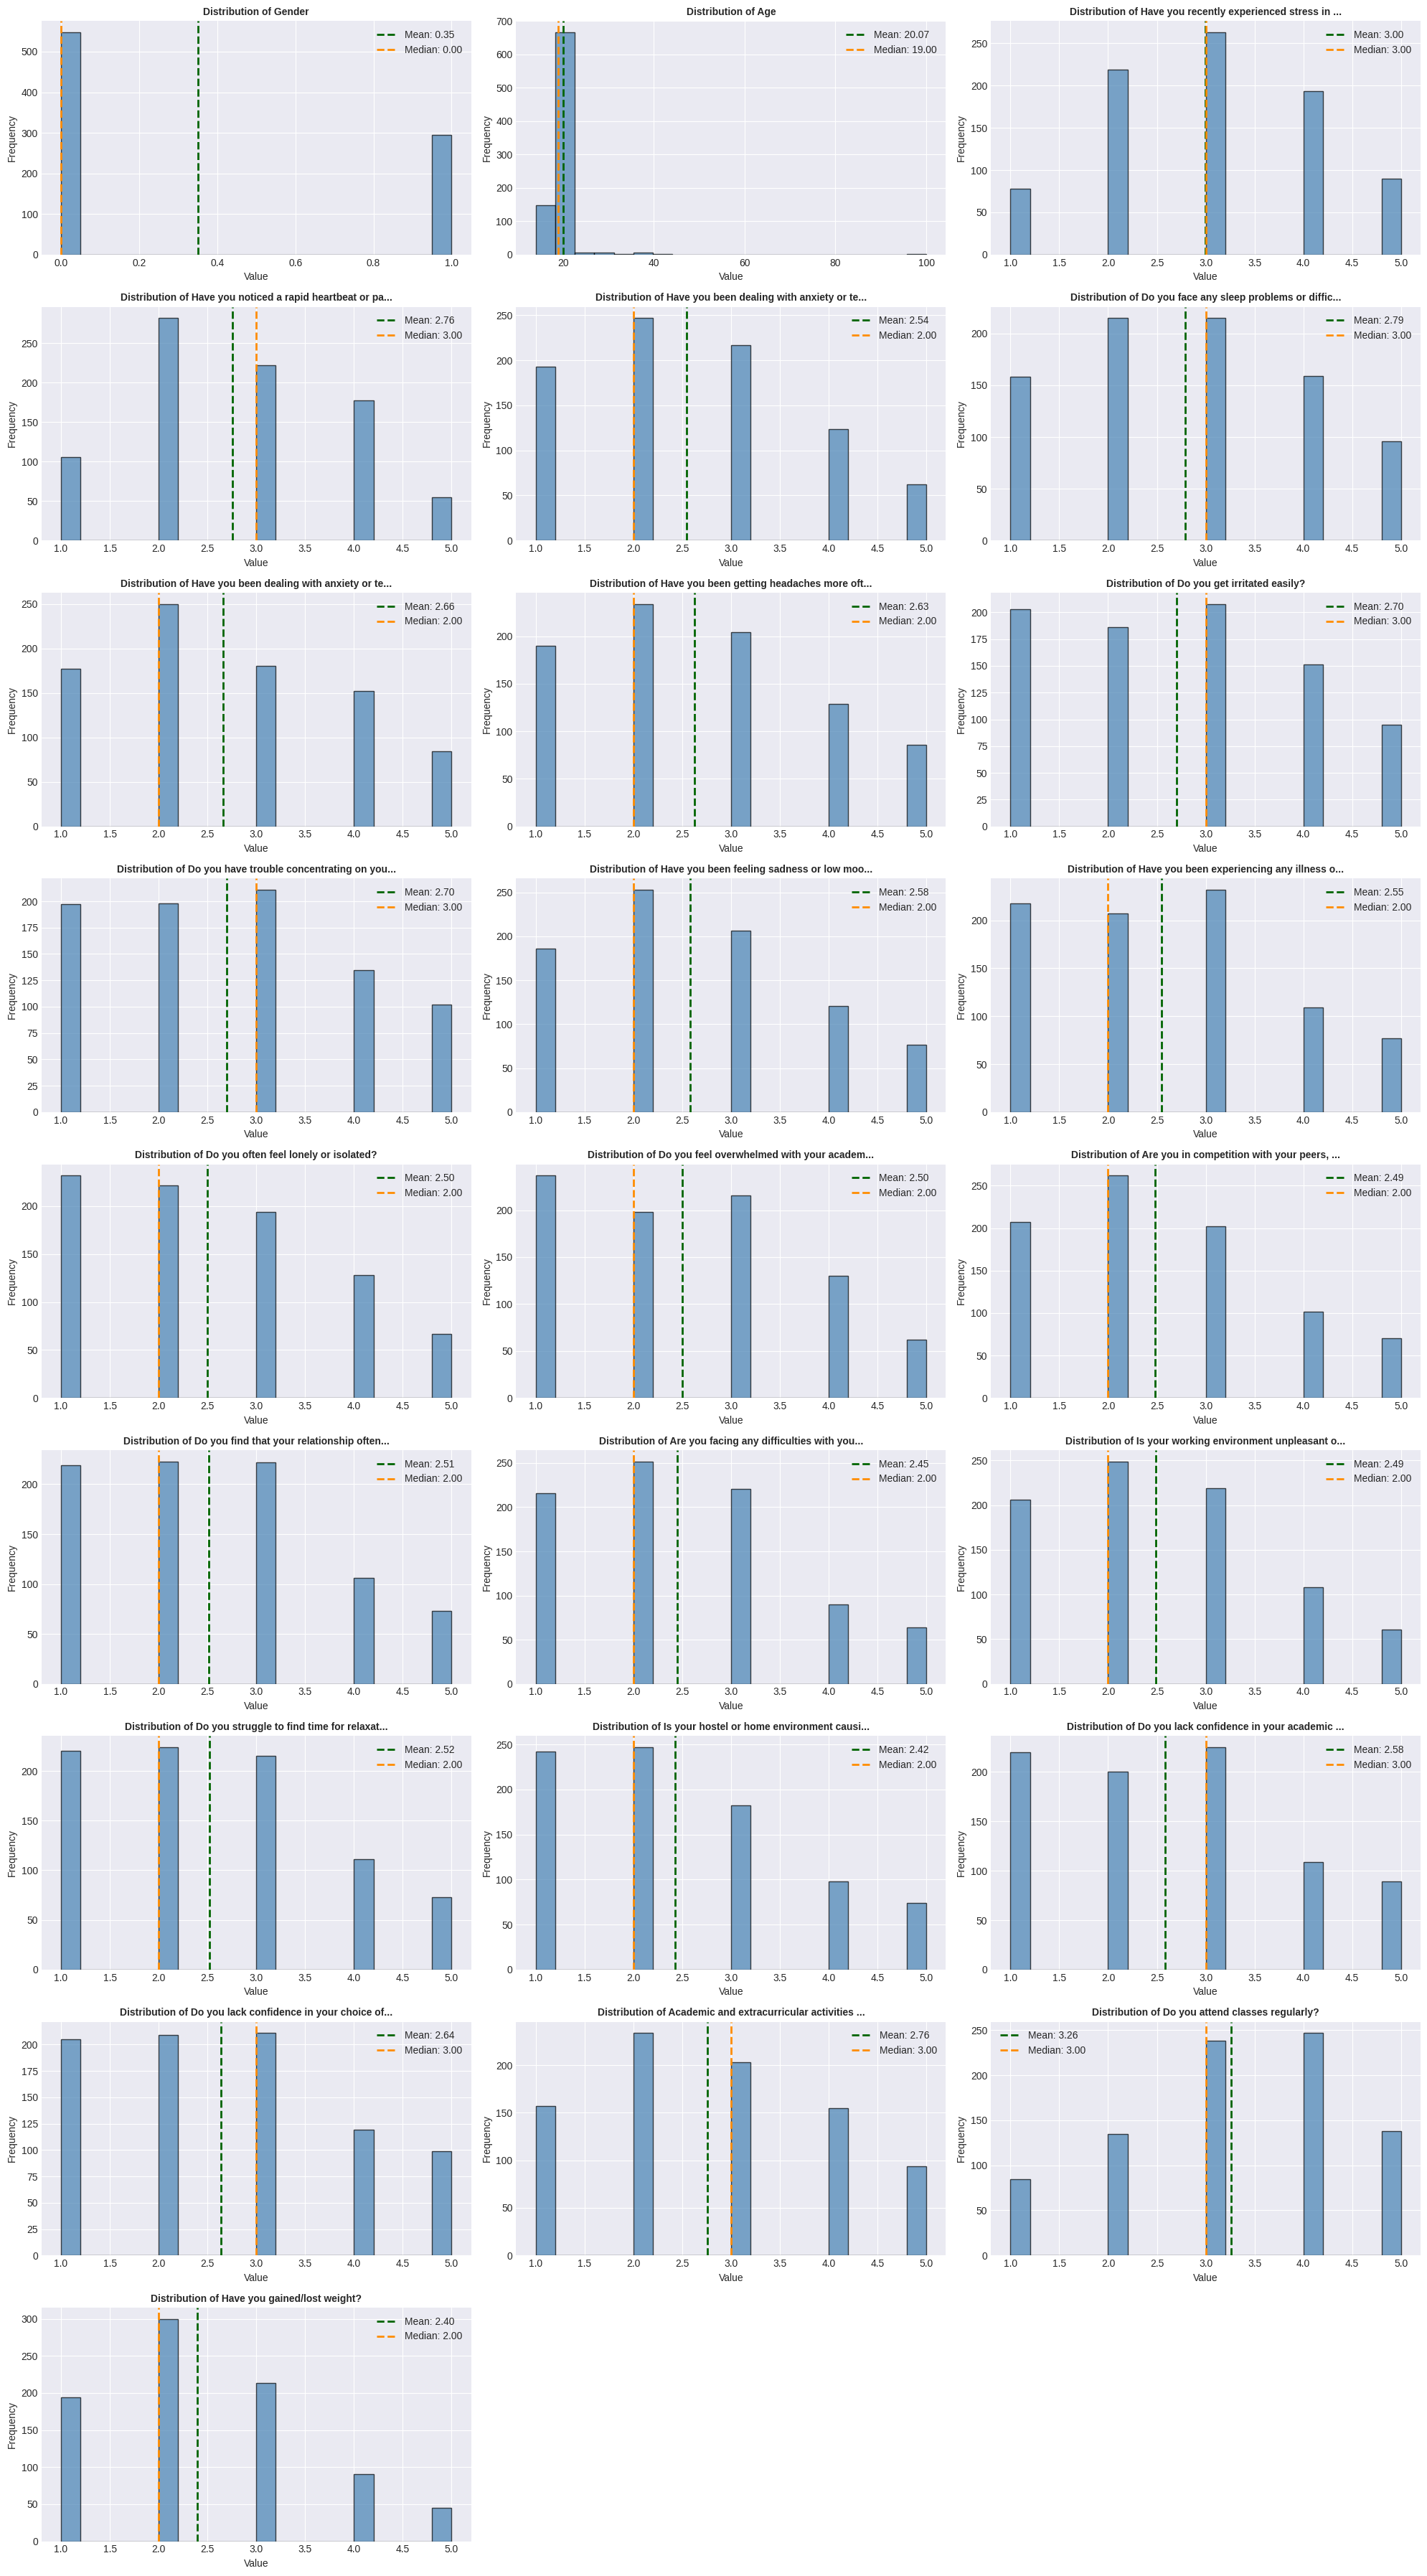


Skewness of Numeric Features:
Age                                                                     11.863526
Gender                                                                   0.630366
Is your hostel or home environment causing you difficulties?             0.577519
Have you gained/lost weight?                                             0.572894
Are you facing any difficulties with your professors or instructors?     0.530070
Are you in competition with your peers, and does it affect you?          0.519131
Is your working environment unpleasant or stressful?                     0.458688
Do you find that your relationship often causes you stress?              0.435945
Do you struggle to find time for relaxation and leisure activities?      0.431621
Do you often feel lonely or isolated?                                    0.421002
Have you been feeling sadness or low mood?                               0.413460
Have you been dealing with anxiety or tension recently?            

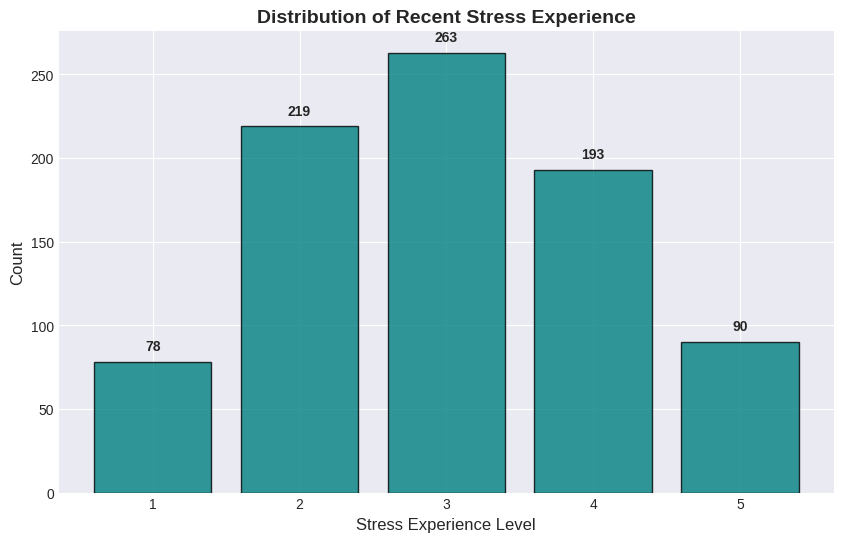


Stress Experience Value Counts:
Have you recently experienced stress in your life?
1     78
2    219
3    263
4    193
5     90
Name: count, dtype: int64

Percentage Distribution:
Have you recently experienced stress in your life?
1     9.25
2    25.98
3    31.20
4    22.89
5    10.68
Name: count, dtype: float64

Which type of stress do you primarily experience? Distribution:
Which type of stress do you primarily experience?
Eustress (Positive Stress) - Stress that motivates and enhances performance.       768
No Stress - Currently experiencing minimal to no stress.                            43
Distress (Negative Stress) - Stress that causes anxiety and impairs well-being.     32
Name: count, dtype: int64


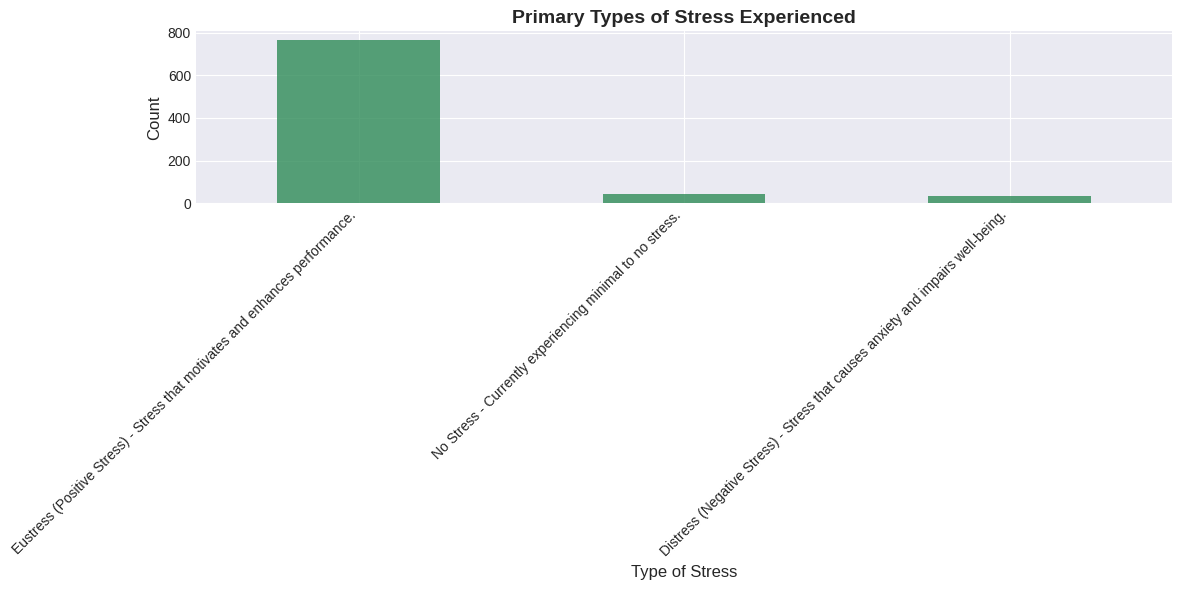


CORRELATION ANALYSIS


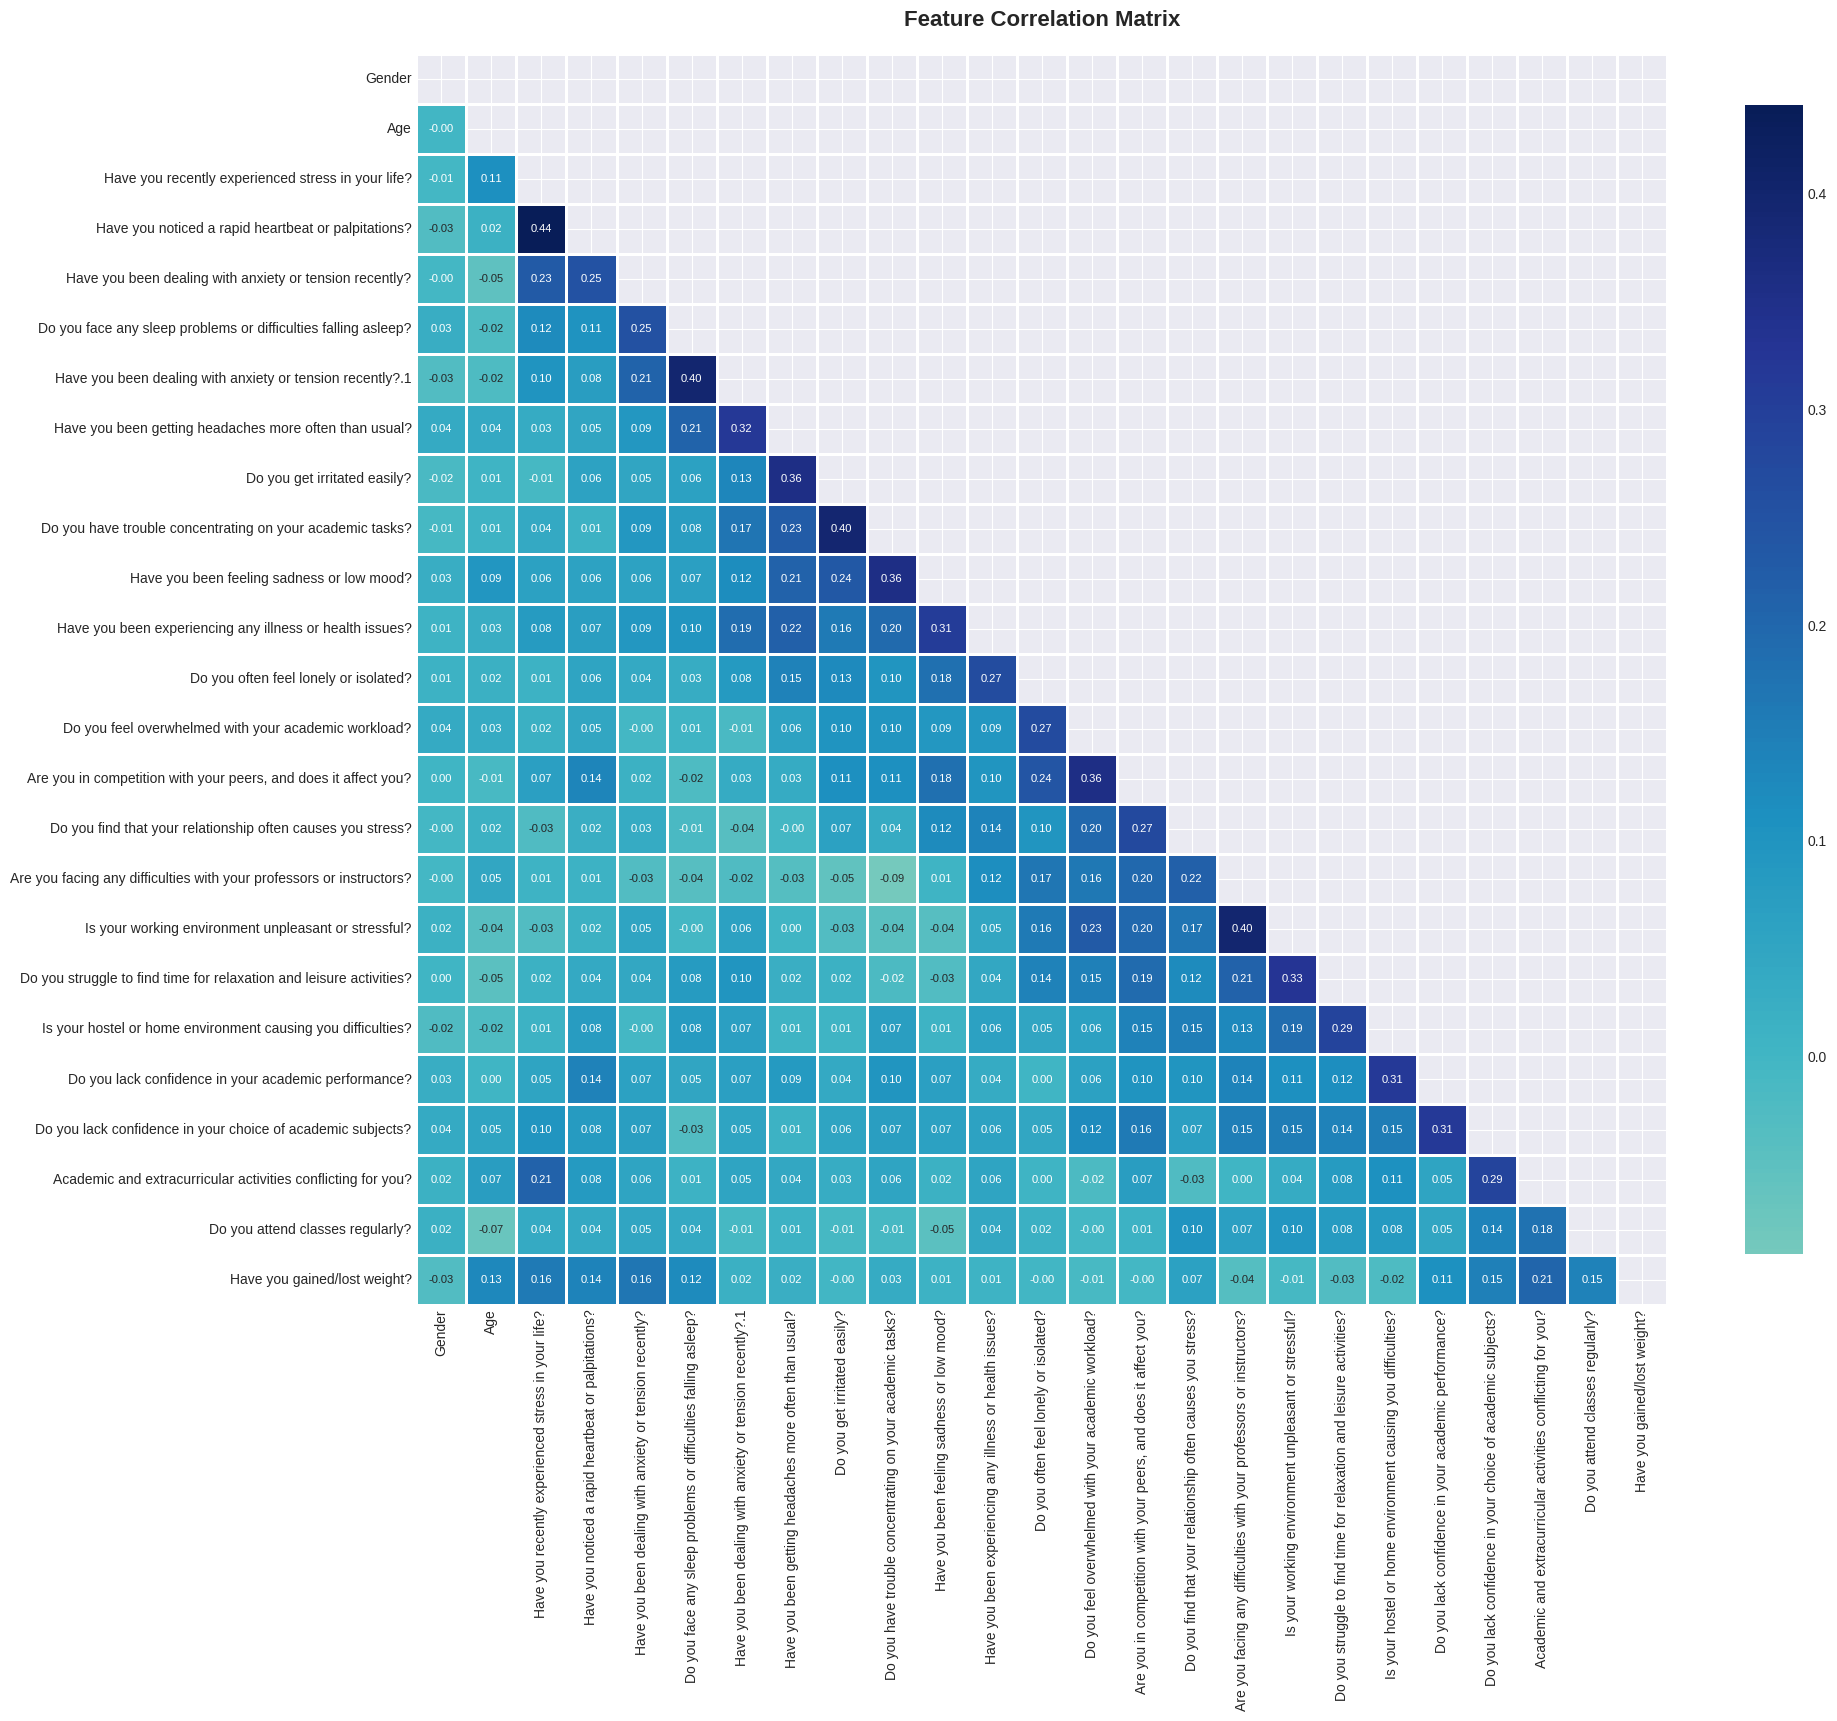


Top 10 Features Correlated with Recent Stress Experience:
Have you noticed a rapid heartbeat or palpitations?                0.441192
Have you been dealing with anxiety or tension recently?            0.230970
Academic and extracurricular activities conflicting for you?       0.211757
Have you gained/lost weight?                                       0.161641
Do you face any sleep problems or difficulties falling asleep?     0.122746
Age                                                                0.114155
Have you been dealing with anxiety or tension recently?.1          0.101108
Do you lack confidence in your choice of academic subjects?        0.099621
Have you been experiencing any illness or health issues?           0.082698
Are you in competition with your peers, and does it affect you?    0.068740
Name: Have you recently experienced stress in your life?, dtype: float64

Bottom 10 Features Correlated with Recent Stress Experience:
Have you been getting headaches more often tha

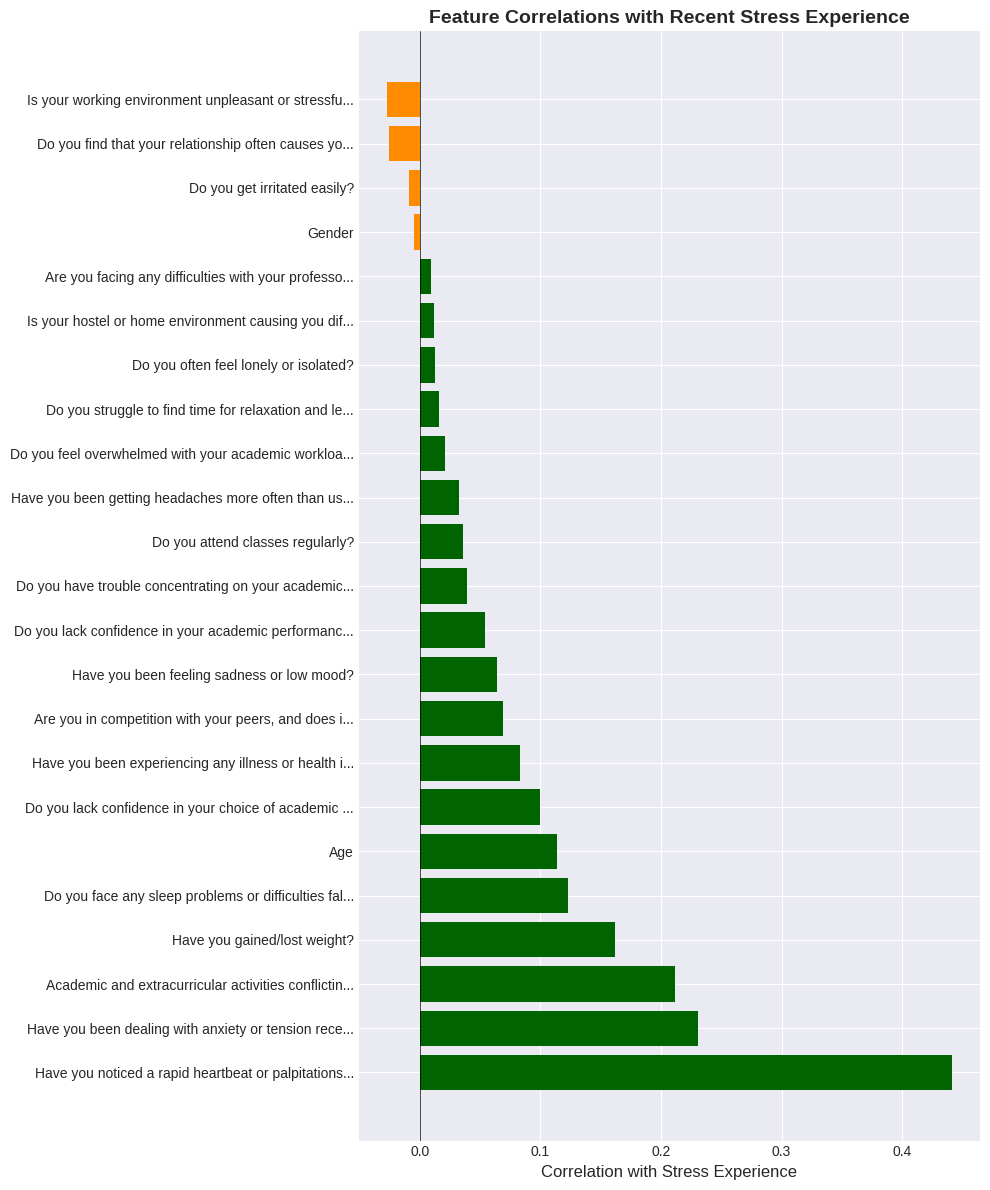


MULTICOLLINEARITY DETECTION

No highly correlated feature pairs found (threshold: 0.7)

BIVARIATE ANALYSIS


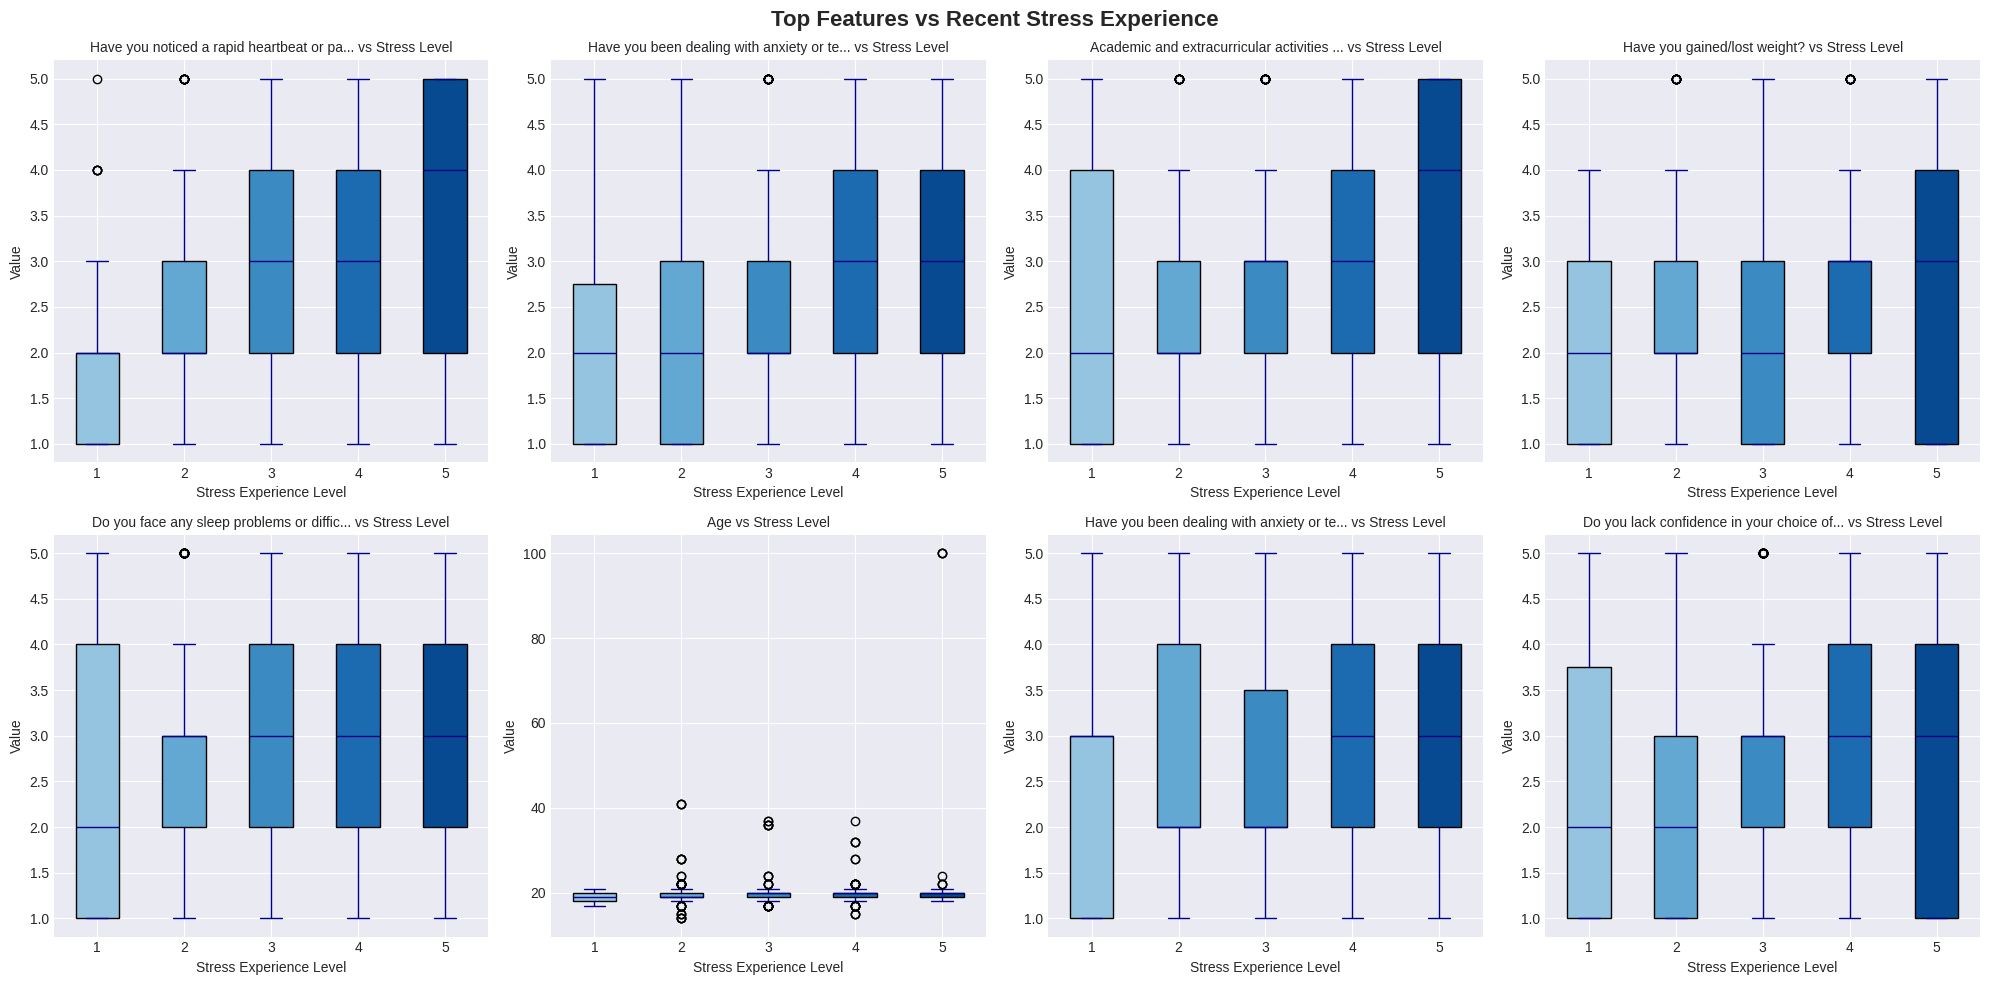


OUTLIER DETECTION

Outlier Summary (IQR Method):
                                                    count  percentage
Age                                                  93.0   11.032028
Have you been feeling sadness or low mood?           77.0    9.134045
Are you in competition with your peers, and doe...   70.0    8.303677
Have you been dealing with anxiety or tension r...   62.0    7.354686
Is your working environment unpleasant or stres...   61.0    7.236062
Have you gained/lost weight?                         45.0    5.338078


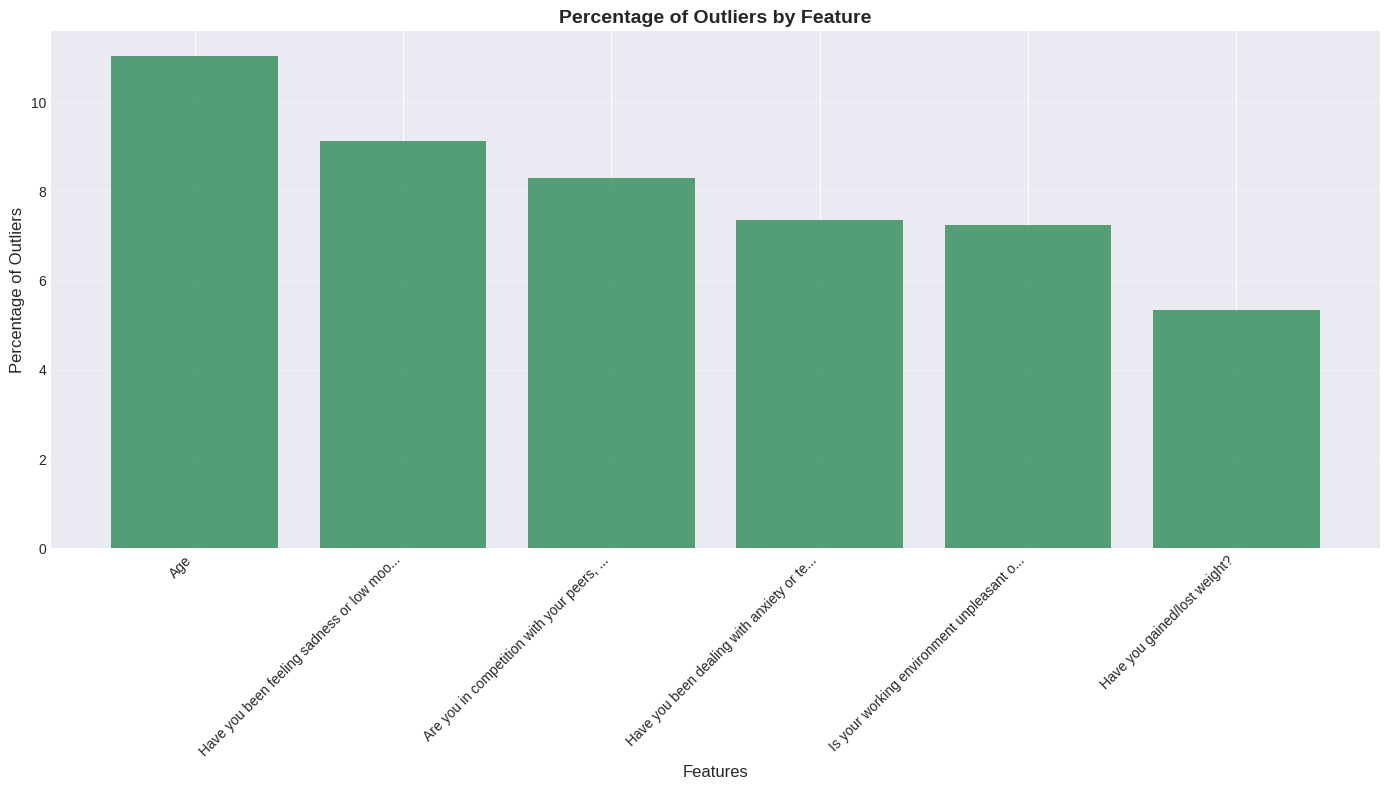


FEATURE IMPORTANCE ANALYSIS

Mutual Information Scores:
                                              Feature  MI Score
2   Have you noticed a rapid heartbeat or palpitat...  0.176426
3   Have you been dealing with anxiety or tension ...  0.070986
21  Academic and extracurricular activities confli...  0.054608
20  Do you lack confidence in your choice of acade...  0.051946
18  Is your hostel or home environment causing you...  0.032095
1                                                 Age  0.031090
0                                              Gender  0.028448
11              Do you often feel lonely or isolated?  0.016098
16  Is your working environment unpleasant or stre...  0.016090
4   Do you face any sleep problems or difficulties...  0.015996
23                       Have you gained/lost weight?  0.014912
22                   Do you attend classes regularly?  0.011583
12  Do you feel overwhelmed with your academic wor...  0.010730
5   Have you been dealing with anxiety or tensi

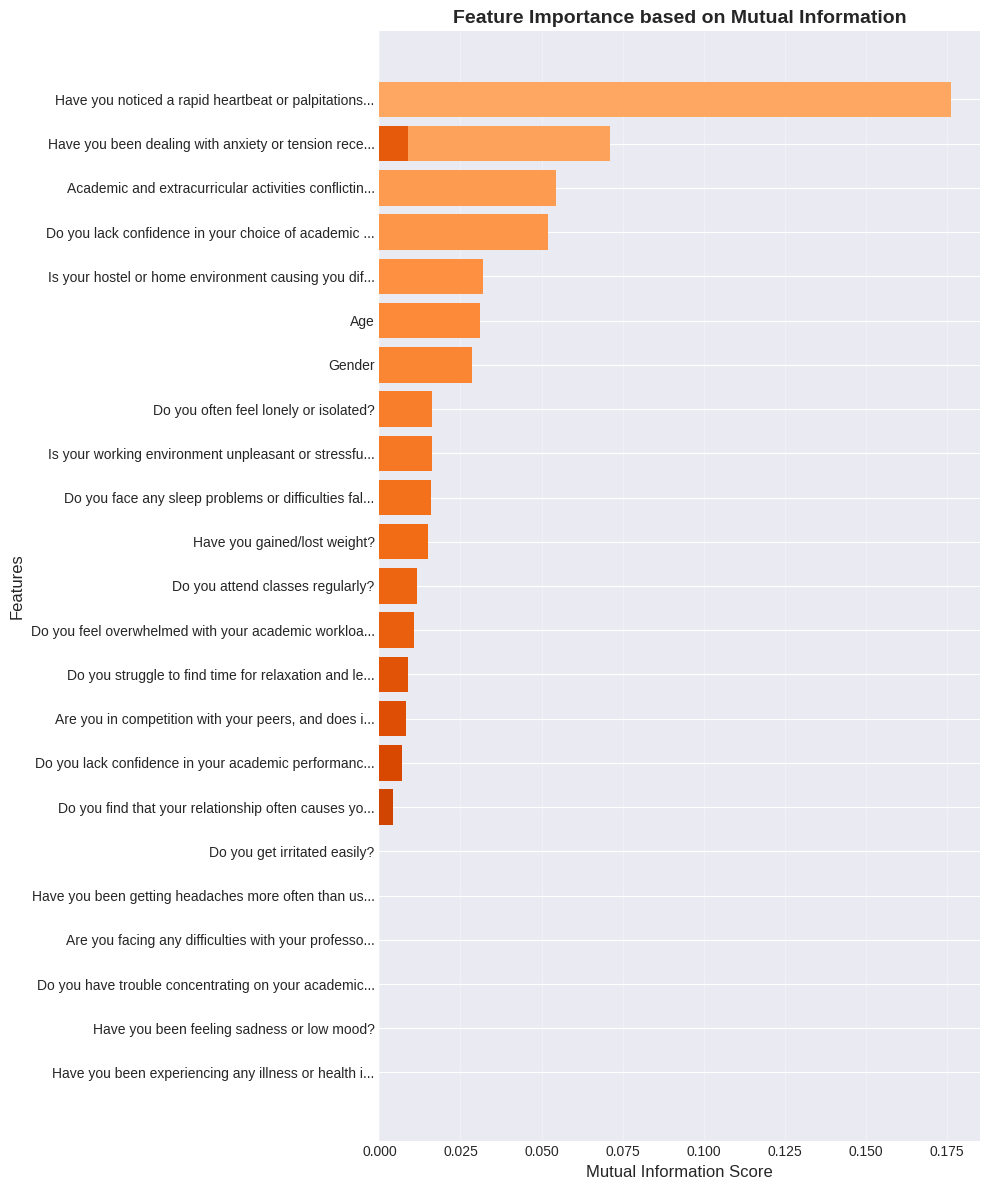


DIMENSIONALITY REDUCTION (PCA)


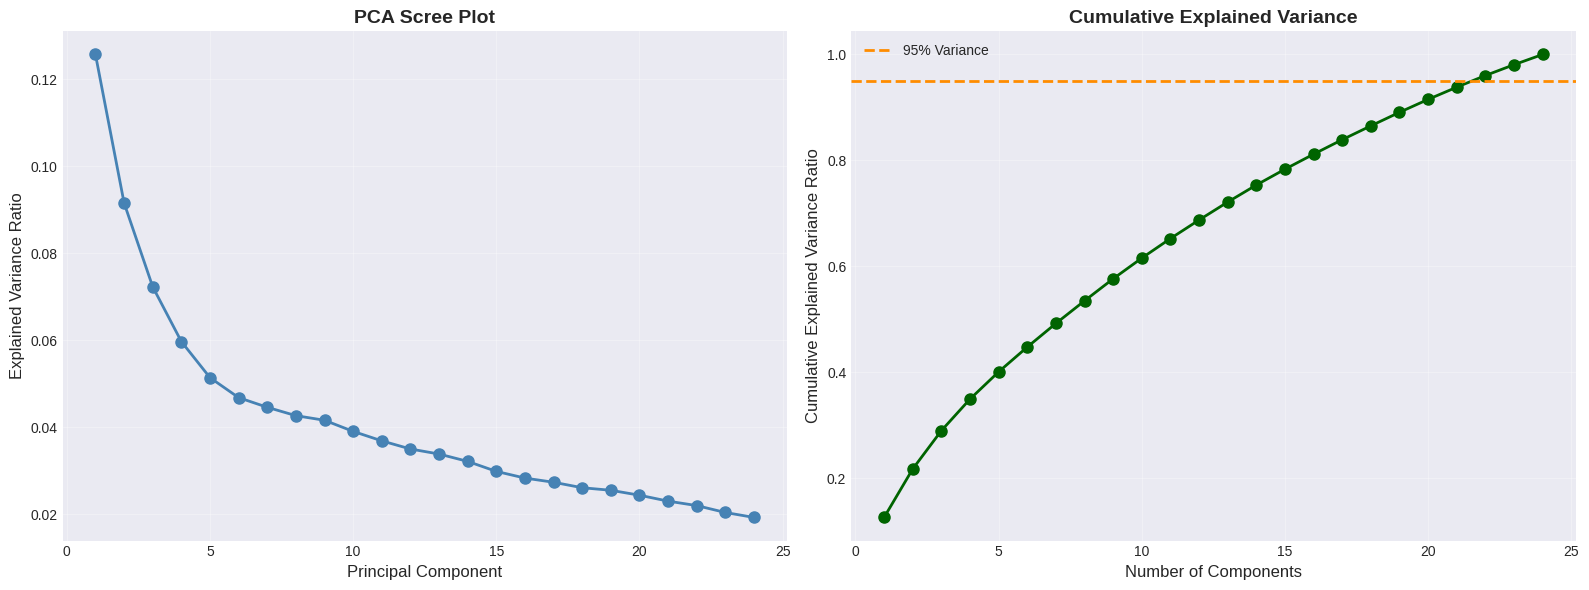


Number of components needed for 95% variance: 22

STATISTICAL TESTS

Normality Test for Recent Stress Experience:
Statistic: 61.0368
P-value: 0.0000
Is normally distributed? No

ANOVA Tests (Feature groups by stress experience):

Have you noticed a rapid heartbeat or palpitations...:
  F-statistic: 51.9414
  P-value: 0.0000
  Significant difference? Yes

Have you been dealing with anxiety or tension rece...:
  F-statistic: 12.1523
  P-value: 0.0000
  Significant difference? Yes

Academic and extracurricular activities conflictin...:
  F-statistic: 12.3660
  P-value: 0.0000
  Significant difference? Yes

RECOMMENDATIONS FOR ML PREPROCESSING

1. FEATURE SCALING:
   - All numeric features appear to be on similar scales (survey responses)
   - StandardScaler or MinMaxScaler recommended for algorithms sensitive to scale
   - Tree-based models may not require scaling

2. HANDLING MULTICOLLINEARITY:
   - No severe multicollinearity detected

3. OUTLIER TREATMENT:
   - Consider capping outlie

In [ ]:
# Comprehensive analysis of stress survey dataset for machine learning insights

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_regression
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
# Custom color palettes - choose one or mix them
blue_palette = sns.color_palette("Blues_r", n_colors=8)
green_palette = sns.color_palette("Greens_r", n_colors=8)
orange_palette = sns.color_palette("Oranges_r", n_colors=8)
# Set a blue-green palette as default
sns.set_palette("viridis")

# =============================================================================
# 1. DATA LOADING AND INITIAL EXPLORATION
# =============================================================================

# Load the dataset
df = pd.read_csv('data/Stress_Dataset.csv')

print("=" * 80)
print("DATASET OVERVIEW")
print("=" * 80)
print(f"Dataset Shape: {df.shape}")
print(f"Total Records: {df.shape[0]}")
print(f"Total Features: {df.shape[1]}")
print("\nColumn Names:")
for i, col in enumerate(df.columns):
    print(f"{i}: {col}")

# Display first few rows
print("\nFirst 5 rows of the dataset:")
print(df.head())

# =============================================================================
# 2. DATA QUALITY ASSESSMENT
# =============================================================================

print("\n" + "=" * 80)
print("DATA QUALITY ASSESSMENT")
print("=" * 80)

# Check data types
print("\nData Types:")
print(df.dtypes)

# Check for missing values
print("\nMissing Values:")
missing_values = df.isnull().sum()
if missing_values.sum() == 0:
    print("No missing values found in the dataset!")
else:
    print(missing_values[missing_values > 0])

# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"\nDuplicate Rows: {duplicates}")

# Basic statistics for numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
print("\nBasic Statistics:")
print(df[numeric_cols].describe())

# =============================================================================
# 3. UNIVARIATE ANALYSIS - DISTRIBUTION OF FEATURES
# =============================================================================

print("\n" + "=" * 80)
print("UNIVARIATE ANALYSIS")
print("=" * 80)

# Create subplots for numeric features
n_numeric = len(numeric_cols)
n_rows = (n_numeric + 2) // 3
fig, axes = plt.subplots(n_rows, 3, figsize=(20, 4*n_rows))
axes = axes.ravel()

for idx, col in enumerate(numeric_cols):
    # Use different shades of blue for histograms
    axes[idx].hist(df[col], bins=20, edgecolor='black', alpha=0.7, color='steelblue')
    # Shorten column names for display
    short_name = col[:40] + "..." if len(col) > 40 else col
    axes[idx].set_title(f'Distribution of {short_name}', fontsize=10, fontweight='bold')
    axes[idx].set_xlabel('Value')
    axes[idx].set_ylabel('Frequency')

    # Add mean and median lines
    mean_val = df[col].mean()
    median_val = df[col].median()
    axes[idx].axvline(mean_val, color='darkgreen', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    axes[idx].axvline(median_val, color='darkorange', linestyle='--', linewidth=2, label=f'Median: {median_val:.2f}')
    axes[idx].legend()

# Hide extra subplots
for idx in range(n_numeric, len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.savefig('feature_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

# Check for skewness
print("\nSkewness of Numeric Features:")
skewness = df[numeric_cols].skew()
print(skewness.sort_values(ascending=False))

# =============================================================================
# 4. TARGET VARIABLE ANALYSIS
# =============================================================================

print("\n" + "=" * 80)
print("TARGET VARIABLE ANALYSIS (Recent Stress Experience)")
print("=" * 80)

# Using "Have you recently experienced stress in your life?" as target
target_col = 'Have you recently experienced stress in your life?'

# Stress experience distribution
plt.figure(figsize=(10, 6))
stress_counts = df[target_col].value_counts().sort_index()
bars = plt.bar(stress_counts.index, stress_counts.values, edgecolor='black', color='teal', alpha=0.8)
plt.xlabel('Stress Experience Level', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Recent Stress Experience', fontsize=14, fontweight='bold')
# Add value labels on bars
for i, v in enumerate(stress_counts.values):
    plt.text(stress_counts.index[i], v + 5, str(v), ha='center', va='bottom', fontweight='bold')
plt.savefig('stress_experience_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nStress Experience Value Counts:")
print(stress_counts)
print(f"\nPercentage Distribution:")
print((stress_counts / len(df) * 100).round(2))

# Analysis of stress type (categorical variable)
stress_type_col = 'Which type of stress do you primarily experience?'
print(f"\n{stress_type_col} Distribution:")
stress_types = df[stress_type_col].value_counts()
print(stress_types)

plt.figure(figsize=(12, 6))
stress_types.plot(kind='bar', color='seagreen', alpha=0.8)
plt.xlabel('Type of Stress', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Primary Types of Stress Experienced', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('stress_types_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# =============================================================================
# 5. CORRELATION ANALYSIS
# =============================================================================

print("\n" + "=" * 80)
print("CORRELATION ANALYSIS")
print("=" * 80)

# Compute correlation matrix for numeric columns only
correlation_matrix = df[numeric_cols].corr()

# Create a large heatmap for correlation matrix
plt.figure(figsize=(20, 18))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
# Use a blue-green colormap
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f',
            cmap='YlGnBu', center=0, square=True, linewidths=1,
            cbar_kws={"shrink": .8}, annot_kws={'size': 8})
plt.title('Feature Correlation Matrix', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Top correlations with target variable
stress_correlations = correlation_matrix[target_col].drop(target_col).sort_values(ascending=False)
print("\nTop 10 Features Correlated with Recent Stress Experience:")
print(stress_correlations.head(10))
print("\nBottom 10 Features Correlated with Recent Stress Experience:")
print(stress_correlations.tail(10))

# Visualize correlations with stress experience
plt.figure(figsize=(10, 12))
colors = ['darkgreen' if x > 0 else 'darkorange' for x in stress_correlations]
# Shorten names for visualization
short_names = [name[:50] + "..." if len(name) > 50 else name for name in stress_correlations.index]
plt.barh(short_names, stress_correlations.values, color=colors)
plt.xlabel('Correlation with Stress Experience', fontsize=12)
plt.title('Feature Correlations with Recent Stress Experience', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.tight_layout()
plt.savefig('stress_correlations.png', dpi=300, bbox_inches='tight')
plt.show()

# =============================================================================
# 6. MULTICOLLINEARITY DETECTION
# =============================================================================

print("\n" + "=" * 80)
print("MULTICOLLINEARITY DETECTION")
print("=" * 80)

# Find highly correlated feature pairs
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:  # Threshold of 0.7
            high_corr_pairs.append({
                'Feature 1': correlation_matrix.columns[i][:50] + "..." if len(correlation_matrix.columns[i]) > 50 else correlation_matrix.columns[i],
                'Feature 2': correlation_matrix.columns[j][:50] + "..." if len(correlation_matrix.columns[j]) > 50 else correlation_matrix.columns[j],
                'Correlation': correlation_matrix.iloc[i, j]
            })

if high_corr_pairs:
    high_corr_df = pd.DataFrame(high_corr_pairs).sort_values('Correlation', ascending=False)
    print("\nHighly Correlated Feature Pairs (|correlation| > 0.7):")
    print(high_corr_df)
else:
    print("\nNo highly correlated feature pairs found (threshold: 0.7)")

# =============================================================================
# 7. BIVARIATE ANALYSIS - FEATURE VS STRESS EXPERIENCE
# =============================================================================

print("\n" + "=" * 80)
print("BIVARIATE ANALYSIS")
print("=" * 80)

# Select top features based on correlation
top_features = stress_correlations.abs().nlargest(8).index.tolist()

# Create box plots for top features vs stress experience
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()

for idx, feature in enumerate(top_features):
    # Group data by stress experience level for the current feature
    data_to_plot = [df[df[target_col] == level][feature].values
                    for level in sorted(df[target_col].unique())]

    # Create box plot with custom colors
    bp = axes[idx].boxplot(data_to_plot, patch_artist=True)

    # Color the boxes with a gradient of blues
    colors = plt.cm.Blues(np.linspace(0.4, 0.9, len(bp['boxes'])))
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)

    # Customize other elements
    for element in ['whiskers', 'fliers', 'medians', 'caps']:
        plt.setp(bp[element], color='darkblue')

    # Shorten feature name for display
    short_feature = feature[:40] + "..." if len(feature) > 40 else feature
    axes[idx].set_title(f'{short_feature} vs Stress Level', fontsize=10)
    axes[idx].set_xlabel('Stress Experience Level')
    axes[idx].set_ylabel('Value')
    axes[idx].set_xticklabels(sorted(df[target_col].unique()))

plt.suptitle('Top Features vs Recent Stress Experience', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('feature_vs_stress_boxplots.png', dpi=300, bbox_inches='tight')
plt.show()

# =============================================================================
# 8. OUTLIER DETECTION
# =============================================================================

print("\n" + "=" * 80)
print("OUTLIER DETECTION")
print("=" * 80)

# Detect outliers using IQR method for numeric columns
outlier_summary = {}
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    outlier_summary[col] = {
        'count': len(outliers),
        'percentage': (len(outliers) / len(df)) * 100
    }

outlier_df = pd.DataFrame(outlier_summary).T
outlier_df = outlier_df.sort_values('count', ascending=False)
print("\nOutlier Summary (IQR Method):")
print(outlier_df[outlier_df['count'] > 0])

# Visualize outliers
if outlier_df[outlier_df['count'] > 0].shape[0] > 0:
    plt.figure(figsize=(14, 8))
    # Shorten names for visualization
    outlier_features = outlier_df[outlier_df['count'] > 0].index
    short_outlier_names = [name[:40] + "..." if len(name) > 40 else name for name in outlier_features]
    plt.bar(short_outlier_names, outlier_df[outlier_df['count'] > 0]['percentage'], color='seagreen', alpha=0.8)
    plt.xlabel('Features', fontsize=12)
    plt.ylabel('Percentage of Outliers', fontsize=12)
    plt.title('Percentage of Outliers by Feature', fontsize=14, fontweight='bold')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.savefig('outlier_percentages.png', dpi=300, bbox_inches='tight')
    plt.show()

# =============================================================================
# 9. FEATURE IMPORTANCE USING MUTUAL INFORMATION
# =============================================================================

print("\n" + "=" * 80)
print("FEATURE IMPORTANCE ANALYSIS")
print("=" * 80)

# Calculate mutual information scores (excluding target and categorical column)
feature_cols = [col for col in numeric_cols if col != target_col]
X = df[feature_cols]
y = df[target_col]

mi_scores = mutual_info_regression(X, y, random_state=42)
mi_scores_df = pd.DataFrame({
    'Feature': X.columns,
    'MI Score': mi_scores
}).sort_values('MI Score', ascending=False)

print("\nMutual Information Scores:")
# Display with shortened names
mi_scores_display = mi_scores_df.copy()
mi_scores_display['Feature'] = [name[:50] + "..." if len(name) > 50 else name for name in mi_scores_display['Feature']]
print(mi_scores_display)

# Visualize mutual information scores
plt.figure(figsize=(10, 12))
# Create gradient colors from orange to dark orange
colors = plt.cm.Oranges(np.linspace(0.4, 0.9, len(mi_scores_df)))
short_mi_names = [name[:50] + "..." if len(name) > 50 else name for name in mi_scores_df['Feature']]
plt.barh(short_mi_names, mi_scores_df['MI Score'], color=colors)
plt.xlabel('Mutual Information Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Feature Importance based on Mutual Information', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('mutual_information_scores.png', dpi=300, bbox_inches='tight')
plt.show()

# =============================================================================
# 10. DIMENSIONALITY REDUCTION VISUALIZATION
# =============================================================================

print("\n" + "=" * 80)
print("DIMENSIONALITY REDUCTION (PCA)")
print("=" * 80)

# Standardize features for PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Plot explained variance
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Scree plot
ax1.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, 'o-',
         color='steelblue', markersize=8, linewidth=2)
ax1.set_xlabel('Principal Component', fontsize=12)
ax1.set_ylabel('Explained Variance Ratio', fontsize=12)
ax1.set_title('PCA Scree Plot', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)

# Cumulative explained variance
ax2.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, 'o-',
         color='darkgreen', markersize=8, linewidth=2)
ax2.axhline(y=0.95, color='darkorange', linestyle='--', linewidth=2, label='95% Variance')
ax2.set_xlabel('Number of Components', fontsize=12)
ax2.set_ylabel('Cumulative Explained Variance Ratio', fontsize=12)
ax2.set_title('Cumulative Explained Variance', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('pca_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Number of components for 95% variance
n_components_95 = np.argmax(cumulative_variance_ratio >= 0.95) + 1
print(f"\nNumber of components needed for 95% variance: {n_components_95}")

# =============================================================================
# 11. STATISTICAL TESTS
# =============================================================================

print("\n" + "=" * 80)
print("STATISTICAL TESTS")
print("=" * 80)

# Test for normality of target variable
statistic, p_value = stats.normaltest(df[target_col])
print(f"\nNormality Test for Recent Stress Experience:")
print(f"Statistic: {statistic:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Is normally distributed? {'Yes' if p_value > 0.05 else 'No'}")

# ANOVA test for top correlated features vs stress experience
print("\nANOVA Tests (Feature groups by stress experience):")
for feature in stress_correlations.abs().nlargest(3).index:
    groups = [group[feature].values for name, group in df.groupby(target_col)]
    f_stat, p_val = stats.f_oneway(*groups)
    short_feature = feature[:50] + "..." if len(feature) > 50 else feature
    print(f"\n{short_feature}:")
    print(f"  F-statistic: {f_stat:.4f}")
    print(f"  P-value: {p_val:.4f}")
    print(f"  Significant difference? {'Yes' if p_val < 0.05 else 'No'}")

# =============================================================================
# 12. DATA PREPROCESSING RECOMMENDATIONS
# =============================================================================

print("\n" + "=" * 80)
print("RECOMMENDATIONS FOR ML PREPROCESSING")
print("=" * 80)

print("\n1. FEATURE SCALING:")
print("   - All numeric features appear to be on similar scales (survey responses)")
print("   - StandardScaler or MinMaxScaler recommended for algorithms sensitive to scale")
print("   - Tree-based models may not require scaling")

print("\n2. HANDLING MULTICOLLINEARITY:")
if high_corr_pairs:
    print("   - Consider removing one feature from highly correlated pairs")
    print("   - Or use dimensionality reduction techniques (PCA, LDA)")
else:
    print("   - No severe multicollinearity detected")

print("\n3. OUTLIER TREATMENT:")
if outlier_df[outlier_df['count'] > 0].shape[0] > 0:
    print("   - Consider capping outliers or using robust scaling")
    print("   - Tree-based models are generally robust to outliers")
else:
    print("   - Minimal outliers detected")

print("\n4. FEATURE ENGINEERING SUGGESTIONS:")
print("   - Create composite stress indices from related questions")
print("   - Consider grouping features by domain (physical, emotional, academic)")
print("   - One-hot encode the categorical stress type variable")

print("\n5. CLASS IMBALANCE:")
stress_dist = df[target_col].value_counts(normalize=True)
if stress_dist.min() < 0.1:
    print("   - Consider using SMOTE or class weights for imbalanced classes")
else:
    print("   - Classes are reasonably balanced")

print("\n6. FEATURE SELECTION:")
print("   - Use mutual information scores for initial feature selection")
print("   - Consider removing duplicate question (.1 suffix)")
print(f"   - Start with top {len(mi_scores_df[mi_scores_df['MI Score'] > 0.1])} features based on MI scores")

# =============================================================================
# 13. SAVE ANALYSIS SUMMARY
# =============================================================================

# Create a summary report
summary_report = f"""
STRESS SURVEY DATASET ANALYSIS SUMMARY
======================================

Dataset Overview:
- Total Records: {df.shape[0]}
- Total Features: {df.shape[1]}
- Numeric Features: {len(numeric_cols)}
- Categorical Features: 1
- No Missing Values: {missing_values.sum() == 0}
- Duplicate Rows: {duplicates}

Target Variable Distribution (Recent Stress Experience):
{stress_counts.to_dict()}

Top 5 Features Correlated with Stress Experience:
{stress_correlations.head(5).to_dict()}

Feature Importance (Top 5 by Mutual Information):
{mi_scores_df.head(5)['MI Score'].to_dict()}

Dimensionality Reduction:
- Components for 95% variance: {n_components_95}

Outliers Detected:
- Features with >5% outliers: {len(outlier_df[outlier_df['percentage'] > 5])}

Preprocessing Recommendations:
1. Scaling: Recommended (StandardScaler/MinMaxScaler)
2. Feature Selection: Start with top {len(mi_scores_df[mi_scores_df['MI Score'] > 0.1])} features
3. Handle categorical variable (stress type) with one-hot encoding
4. Consider ensemble methods for robustness
5. Address duplicate column name issue
"""

# Save summary to file
with open('stress_survey_analysis_summary.txt', 'w') as f:
    f.write(summary_report)

print("\n" + "=" * 80)
print("ANALYSIS COMPLETE!")
print("=" * 80)
print("\nFiles saved:")
print("- feature_distributions.png")
print("- stress_experience_distribution.png")
print("- stress_types_distribution.png")
print("- correlation_matrix.png")
print("- stress_correlations.png")
print("- feature_vs_stress_boxplots.png")
print("- outlier_percentages.png")
print("- mutual_information_scores.png")
print("- pca_analysis.png")
print("- stress_survey_analysis_summary.txt")
print("\nReady for ML modeling!")

In [ ]:
# Load, process and split stress dataset using stress type as target variable

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('data/Stress_Dataset.csv')

# Define target variable (stress type)
target_col = 'Which type of stress do you primarily experience?'
y = df[target_col]

# Separate features (all columns except target)
X = df.drop(columns=[target_col])

# Label encode the target variable (stress type)
le = LabelEncoder()
y = le.fit_transform(y)

# Print encoding mapping
print("Stress type encoding:")
for i, class_name in enumerate(le.classes_):
    print(f"  {class_name}: {i}")

# Print result info
print("\nX.dtypes after processing:\n", X.dtypes)
print("\nStress type class counts:\n", pd.Series(y).value_counts().sort_index())

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

Stress type encoding:
  Distress (Negative Stress) - Stress that causes anxiety and impairs well-being.: 0
  Eustress (Positive Stress) - Stress that motivates and enhances performance.: 1
  No Stress - Currently experiencing minimal to no stress.: 2

X.dtypes after processing:
 Gender                                                                  int64
Age                                                                     int64
Have you recently experienced stress in your life?                      int64
Have you noticed a rapid heartbeat or palpitations?                     int64
Have you been dealing with anxiety or tension recently?                 int64
Do you face any sleep problems or difficulties falling asleep?          int64
Have you been dealing with anxiety or tension recently?.1               int64
Have you been getting headaches more often than usual?                  int64
Do you get irritated easily?                                            int64
Do you have troubl